# Especializaação em Inteligência Artificial Aplicada

## UFPR

## IAA007 e IAA008 - 2022 - Aprendizado de Máquina e Laboratório de IA

### Prof. Dr. Jaime Wojciechowski
### Estudante Clístenes Grizafis Bento
#### Seed utilizado: 85941

## Trabalho Final

___

### Classificação

#### Tabela de resultados de Veículos

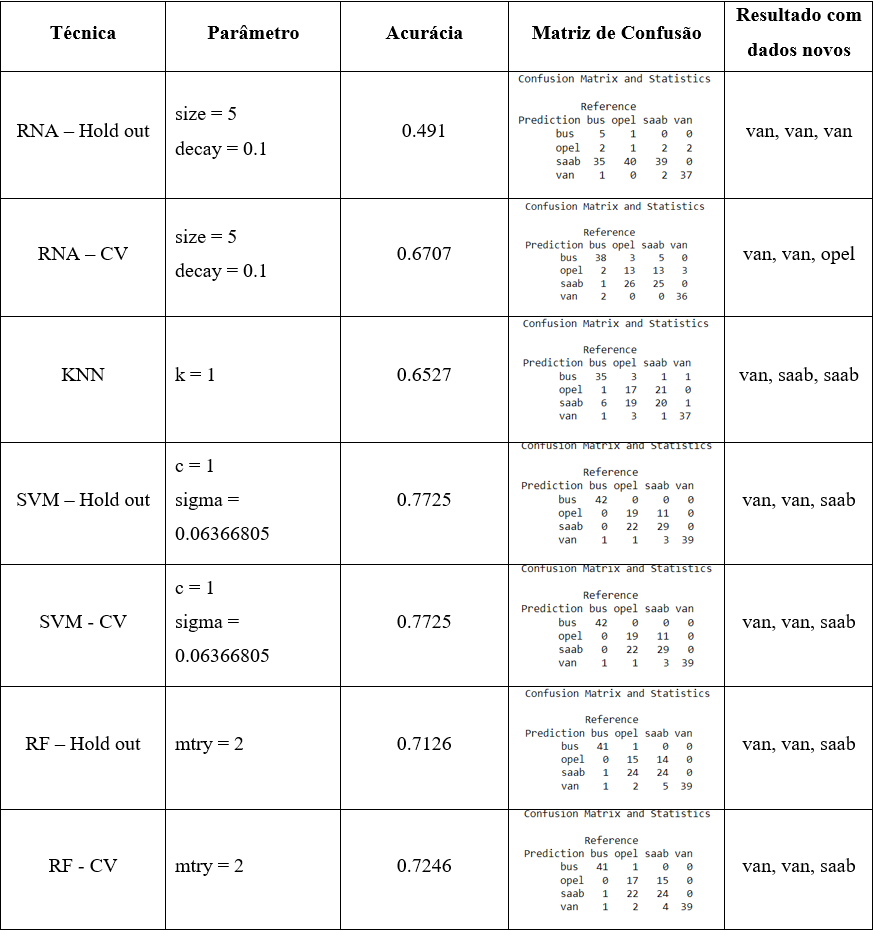

---

#### Listas de comandos usados, dados novos e resultados

Preparativos iniciais

In [2]:
#Importando biblioteca
library(caret)

#Criando dataFrame dos dados de veículos
dados_veiculos <- read.csv ("dados/Prática Veículos-20220813/Material 02 - 5 - C - Veiculos - Dados.csv")

#Removendo identificador único
dados_veiculos$a <- NULL

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Separando dados de teste e de treino
indices_veiculos <- createDataPartition(dados_veiculos$tipo, p=0.8, list=F)
treino_veiculos <- dados_veiculos[indices_veiculos,]
teste_veiculos <- dados_veiculos[-indices_veiculos,]

___

RNA - Hold out

In [3]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna <- train(tipo ~., data = treino_veiculos, method = "nnet", trace=F)

#Exibindo resultado do treino
rna

Neural Network 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 679, 679, 679, 679, 679, 679, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa     
  1     0e+00  0.2475141  0.01717271
  1     1e-04  0.2542129  0.02069871
  1     1e-01  0.4368892  0.25625817
  3     0e+00  0.2999435  0.08321089
  3     1e-04  0.3006301  0.08676842
  3     1e-01  0.5680331  0.42467122
  5     0e+00  0.3023699  0.08520482
  5     1e-04  0.3182838  0.10735057
  5     1e-01  0.5818335  0.44283647

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.1.

Temos **SIZE** = 5 e **DECAY** = 0.1

In [4]:
#Testando modelo treinado
predict.rna <- predict(rna, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus    5    1    0   0
      opel   2    1    2   2
      saab  35   40   39   0
      van    1    0    2  37

Overall Statistics
                                         
               Accuracy : 0.491          
                 95% CI : (0.413, 0.5694)
    No Information Rate : 0.2575         
    P-Value [Acc > NIR] : 8.502e-11      
                                         
                  Kappa : 0.32           
                                         
 Mcnemar's Test P-Value : 4.395e-14      

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity             0.11628    0.023810      0.9070     0.9487
Specificity             0.99194    0.952000      0.3952     0.9766
Pos Pred Value          0.83333    0.142857      0.3421     0.9250
Neg Pred Value          0.76398    0.743750      0.9245     0.9843
Prevalence              0.25749    0.251497   

A **Acurácia** foi de **0.491**

**Resultado com novos dados**

In [5]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_rna <- predict(rna, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_rna <- cbind(dados_novos_veiculos, resultado_veiculos_novos_rna)

#Exibindo resultado
print(resultado_veiculos_novos_rna)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_rna
1                          van
2                          van
3                          van


O resultado com novos dados usando **RNA - Hold out** foi **van, van, van**

***

RNA - CV

In [6]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna2 <- train(tipo ~., data = treino_veiculos, method = "nnet", trace=F, trControl = ctrl)

#Exibindo resultado do treino
rna2

Neural Network 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 611, 612, 610, 611, 611, 611, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa      
  1     0e+00  0.2577051  0.004162254
  1     1e-04  0.2750538  0.026420132
  1     1e-01  0.4934585  0.322424175
  3     0e+00  0.3638728  0.147501448
  3     1e-04  0.3332538  0.106893444
  3     1e-01  0.6011289  0.467681804
  5     0e+00  0.3687238  0.157777372
  5     1e-04  0.3418359  0.117704146
  5     1e-01  0.6321128  0.509332633

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.1.

Temos **SIZE** = 5 e **DECAY** = 0.1

In [7]:
#Testando modelo treinado
predict.rna2 <- predict(rna2, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna2, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   38    3    5   0
      opel   2   13   13   3
      saab   1   26   25   0
      van    2    0    0  36

Overall Statistics
                                          
               Accuracy : 0.6707          
                 95% CI : (0.5938, 0.7413)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5603          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.8837     0.30952      0.5814     0.9231
Specificity              0.9355     0.85600      0.7823     0.9844
Pos Pred Value           0.8261     0.41935      0.4808     0.9474
Neg Pred Value           0.9587     0.78676      0.8435     0.9767
Prevalence               0.2575     0

A **Acurácia** foi de **0.6707**

**Resultado com novos dados**

In [8]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_rna2 <- predict(rna2, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_rna2 <- cbind(dados_novos_veiculos, resultado_veiculos_novos_rna2)

#Exibindo resultado
print(resultado_veiculos_novos_rna2)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_rna2
1                           van
2                           van
3                          opel


O resultado com novos dados usando **RNA - CV** foi **van, van, opel**

___

KNN

In [9]:
#Fazendo grid com valores de k para teste de melhor valor em KNN
tuneGrid <- expand.grid(k=c(1,3,5,7,9))

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
knn <- train(tipo ~., data = treino_veiculos, method = "knn", tuneGrid = tuneGrid)

#Exibindo resultado do treino
knn

k-Nearest Neighbors 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 679, 679, 679, 679, 679, 679, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  1  0.6234370  0.4971882
  3  0.6036817  0.4712101
  5  0.6022782  0.4693636
  7  0.5968883  0.4621603
  9  0.5953892  0.4600865

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

O melhor valor para **K** é **1**

In [10]:
#Testando modelo treinado
predict.knn <- predict(knn, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.knn, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   35    3    1   1
      opel   1   17   21   0
      saab   6   19   20   1
      van    1    3    1  37

Overall Statistics
                                          
               Accuracy : 0.6527          
                 95% CI : (0.5753, 0.7246)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5369          
                                          
 Mcnemar's Test P-Value : 0.2632          

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.8140      0.4048      0.4651     0.9487
Specificity              0.9597      0.8240      0.7903     0.9609
Pos Pred Value           0.8750      0.4359      0.4348     0.8810
Neg Pred Value           0.9370      0.8047      0.8099     0.9840
Prevalence               0.2575      

A **Acurácia** foi de **0.6527**

**Resultado com novos dados**

In [11]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_knn <- predict(knn, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_knn <- cbind(dados_novos_veiculos, resultado_veiculos_novos_knn)

#Exibindo resultado
print(resultado_veiculos_novos_knn)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_knn
1                          van
2                         saab
3                         saab


O resultado com novos dados usando **KNN** foi **van, saab, saab**

___

SVM - Hold out

In [12]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm <- train(tipo ~., data = treino_veiculos, method = "svmRadial")

#Exibindo resultado do treino
svm

Support Vector Machines with Radial Basis Function Kernel 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 679, 679, 679, 679, 679, 679, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7112418  0.6149643
  0.50  0.7387898  0.6512009
  1.00  0.7606022  0.6803512

Tuning parameter 'sigma' was held constant at a value of 0.06366805
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.06366805 and C = 1.

Temos **C** = 1 e **SIGMA** = 0.06366805

In [13]:
#Testando modelo treinado
predict.svm <- predict(svm, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   42    0    0   0
      opel   0   19   11   0
      saab   0   22   29   0
      van    1    1    3  39

Overall Statistics
                                          
               Accuracy : 0.7725          
                 95% CI : (0.7013, 0.8337)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6966          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.9767      0.4524      0.6744     1.0000
Specificity              1.0000      0.9120      0.8226     0.9609
Pos Pred Value           1.0000      0.6333      0.5686     0.8864
Neg Pred Value           0.9920      0.8321      0.8793     1.0000
Prevalence               0.2575      

A **Acurácia** foi de **0.6527**

**Resultado com novos dados**

In [14]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_svm <- predict(svm, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_svm <- cbind(dados_novos_veiculos, resultado_veiculos_novos_svm)

#Exibindo resultado
print(resultado_veiculos_novos_svm)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_svm
1                          van
2                          van
3                         saab


O resultado com novos dados usando **SVM - Hold out** foi **van, van, saab**

___

SVM - CV

In [15]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm2 <- train(tipo ~., data = treino_veiculos, method = "svmRadial", trControl = ctrl)

#Exibindo resultado do treino
svm2

Support Vector Machines with Radial Basis Function Kernel 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 611, 612, 610, 611, 611, 611, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7079898  0.6110419
  0.50  0.7449972  0.6601001
  1.00  0.7700010  0.6933465

Tuning parameter 'sigma' was held constant at a value of 0.06366805
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.06366805 and C = 1.

Temos **C** = 1 e **SIGMA** = 0.06366805

In [16]:
#Testando modelo treinado
predict.svm2 <- predict(svm2, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm2, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   42    0    0   0
      opel   0   19   11   0
      saab   0   22   29   0
      van    1    1    3  39

Overall Statistics
                                          
               Accuracy : 0.7725          
                 95% CI : (0.7013, 0.8337)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6966          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.9767      0.4524      0.6744     1.0000
Specificity              1.0000      0.9120      0.8226     0.9609
Pos Pred Value           1.0000      0.6333      0.5686     0.8864
Neg Pred Value           0.9920      0.8321      0.8793     1.0000
Prevalence               0.2575      

A **Acurácia** foi de **0.7725**

**Resultado com novos dados**

In [17]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_svm2 <- predict(svm2, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_svm2 <- cbind(dados_novos_veiculos, resultado_veiculos_novos_svm2)

#Exibindo resultado
print(resultado_veiculos_novos_svm2)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_svm2
1                           van
2                           van
3                          saab


O resultado com novos dados usando **SVM - CV** foi **van, van, saab**

---

RF - Hold Out

In [18]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf <- train(tipo ~., data = treino_veiculos, method = "rf")

#Exibindo resultado do treino
rf

Random Forest 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 679, 679, 679, 679, 679, 679, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7575288  0.6762827
  10    0.7431858  0.6571135
  18    0.7383559  0.6507447

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Temos **mtry** = 2

In [19]:
#Testando modelo treinado
predict.rf <- predict(rf, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rf, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   41    1    0   0
      opel   0   15   14   0
      saab   1   24   24   0
      van    1    2    5  39

Overall Statistics
                                          
               Accuracy : 0.7126          
                 95% CI : (0.6376, 0.7799)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6169          
                                          
 Mcnemar's Test P-Value : 0.04927         

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.9535     0.35714      0.5581     1.0000
Specificity              0.9919     0.88800      0.7984     0.9375
Pos Pred Value           0.9762     0.51724      0.4898     0.8298
Neg Pred Value           0.9840     0.80435      0.8390     1.0000
Prevalence               0.2575     0

A **Acurácia** foi de **0.7126**

**Resultado com novos dados**

In [20]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_rf <- predict(rf, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_rf <- cbind(dados_novos_veiculos, resultado_veiculos_novos_rf)

#Exibindo resultado
print(resultado_veiculos_novos_rf)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_rf
1                         van
2                         van
3                        saab


O resultado com novos dados usando **RF - Hold out** foi **van, van, saab**

---

RF - CV

In [21]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf2 <- train(tipo ~., data = treino_veiculos, method = "rf", trControl = ctrl)

#Exibindo resultado do treino
rf2


Random Forest 

679 samples
 18 predictor
  4 classes: 'bus', 'opel', 'saab', 'van' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 611, 612, 610, 611, 611, 611, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7568071  0.6757367
  10    0.7552932  0.6737143
  18    0.7390703  0.6521171

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Temos **mtry** = 2

In [22]:
#Testando modelo treinado
predict.rf2 <- predict(rf2, teste_veiculos)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rf2, as.factor(teste_veiculos$tipo))

Confusion Matrix and Statistics

          Reference
Prediction bus opel saab van
      bus   41    1    0   0
      opel   0   17   15   0
      saab   1   22   24   0
      van    1    2    4  39

Overall Statistics
                                          
               Accuracy : 0.7246          
                 95% CI : (0.6502, 0.7907)
    No Information Rate : 0.2575          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6329          
                                          
 Mcnemar's Test P-Value : 0.1116          

Statistics by Class:

                     Class: bus Class: opel Class: saab Class: van
Sensitivity              0.9535      0.4048      0.5581     1.0000
Specificity              0.9919      0.8800      0.8145     0.9453
Pos Pred Value           0.9762      0.5312      0.5106     0.8478
Neg Pred Value           0.9840      0.8148      0.8417     1.0000
Prevalence               0.2575      

A **Acurácia** foi de **0.7246**

**Resultado com novos dados**

In [23]:
#Adicionando dados de veículos novos
dados_novos_veiculos <- read.csv("dados/Prática Veículos-20220813/Material 03 - 5 - C - Veiculos - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_veiculos$a <- NULL

#Realizando previsão com dados novos
resultado_veiculos_novos_rf2 <- predict(rf2, dados_novos_veiculos)

#Removendo coluna de classe dos dados novos
dados_novos_veiculos$tipo <- NULL

#Unindo dados novos com resultados da previsão
resultado_veiculos_novos_rf2 <- cbind(dados_novos_veiculos, resultado_veiculos_novos_rf2)

#Exibindo resultado
print(resultado_veiculos_novos_rf2)

  Comp Circ DCirc RadRa PrAxisRa MaxLRa ScatRa Elong PrAxisRect MaxLRect
1  100   48    83   178       72     10    162    42         20      159
2   91   40    84   141       57      9    149    45         18      143
3   92   50   106   209       66     10    207    32         23      160
  ScVarMaxis ScVarmaxis RaGyr SkewMaxis Skewmaxis Kurtmaxis KurtMaxis HollRa
1        176        400   184        70         6        16       187    197
2        170        330    70        72         9        14       189    199
3        223        635   220        73        14         9       188    230
  resultado_veiculos_novos_rf2
1                          van
2                          van
3                         saab


O resultado com novos dados usando **RF - CV** foi **van, van, saab**

---

#### Tabela de resultados de Imposto de Renda

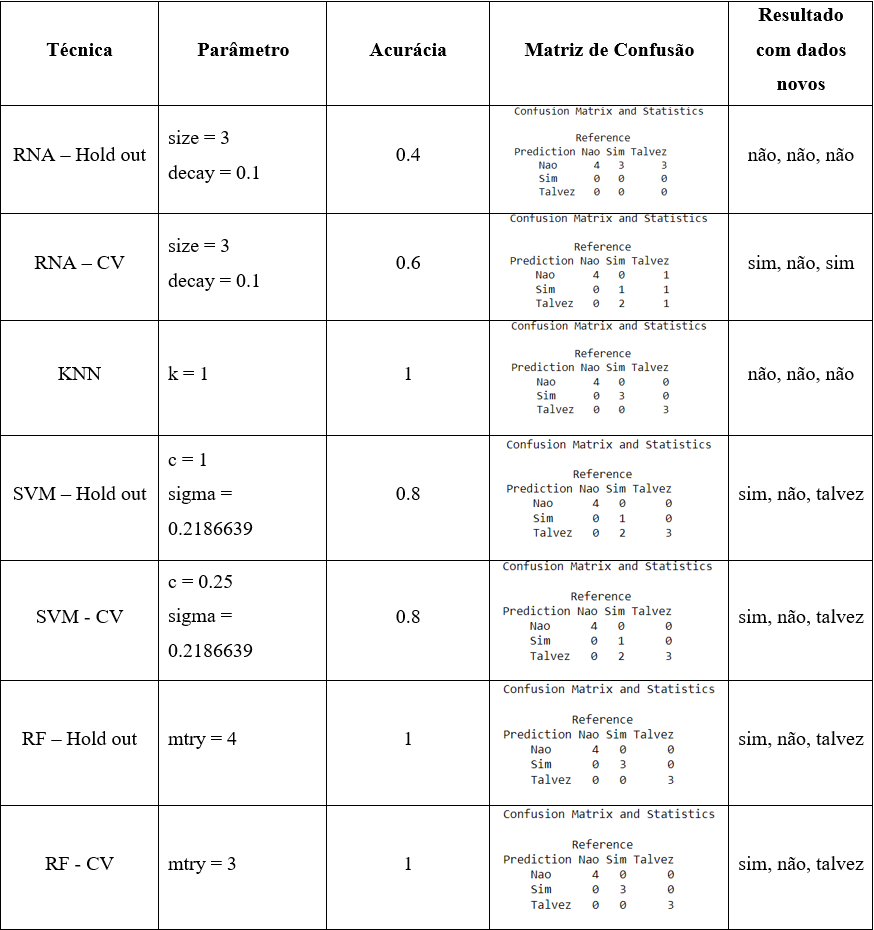

---

#### Listas de comandos usados, dados novos e resultados

Preparativos iniciais

In [24]:
#Importando biblioteca
library(caret)

#Criando dataFrame dos dados
dados_IR <- read.csv ("dados/Prática Imposto de Renda-20220813/Material 03 - 7 – C - IR - Dados.csv")

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Separando dados de teste e de treino
indices_IR <- createDataPartition(dados_IR$sonegador, p=0.8, list=F)
treino_IR <- dados_IR[indices_IR,]
teste_IR <- dados_IR[-indices_IR,]

---

RNA - Hold out

In [25]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna <- train(sonegador ~., data = treino_IR, method = "nnet", trace=F)

#Exibindo resultado do treino
rna

Neural Network 

40 samples
 3 predictor
 3 classes: 'Nao', 'Sim', 'Talvez' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 40, 40, 40, 40, 40, 40, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa       
  1     0e+00  0.3003367  -0.008322148
  1     1e-04  0.3110033   0.008211921
  1     1e-01  0.3701300   0.074613041
  3     0e+00  0.3056700   0.001290323
  3     1e-04  0.3030033   0.000000000
  3     1e-01  0.5771656   0.391645621
  5     0e+00  0.3083367   0.004238411
  5     1e-04  0.3190033   0.019865772
  5     1e-01  0.5467013   0.360871089

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 3 and decay = 0.1.

Temos **SIZE** = 3 e **DECAY** = 0.1

In [26]:
#Testando modelo treinado
predict.rna <- predict(rna, teste_IR)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna, as.factor(teste_IR$sonegador))

Confusion Matrix and Statistics

          Reference
Prediction Nao Sim Talvez
    Nao      4   3      3
    Sim      0   0      0
    Talvez   0   0      0

Overall Statistics
                                          
               Accuracy : 0.4             
                 95% CI : (0.1216, 0.7376)
    No Information Rate : 0.4             
    P-Value [Acc > NIR] : 0.6177          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Nao Class: Sim Class: Talvez
Sensitivity                 1.0        0.0           0.0
Specificity                 0.0        1.0           1.0
Pos Pred Value              0.4        NaN           NaN
Neg Pred Value              NaN        0.7           0.7
Prevalence                  0.4        0.3           0.3
Detection Rate              0.4        0.0           0.0
Detection Prev

A **Acurácia** foi de **0.4**

**Resultado com novos dados**

In [27]:
#Adicionando dados novos
dados_novos_IR <- read.csv("dados/Prática Imposto de Renda-20220813/Material 03 - 7 – C - IR - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_IR_novos_rna <- predict(rna, dados_novos_IR)

#Removendo coluna de classe dos dados novos
dados_novos_IR$sonegador <- NULL

#Unindo dados novos com resultados da previsão
resultado_IR_novos_rna <- cbind(dados_novos_IR, resultado_IR_novos_rna)

#Exibindo resultado
print(resultado_IR_novos_rna)

  rest   ecivil rendimento resultado_IR_novos_rna
1  Sim Solteiro      99000                    Nao
2  Nao   Casado       9999                    Nao
3  Nao Solteiro      73200                    Nao


O resultado com novos dados usando **RNA - Hold out** foi **não, não, não**

---

RNA - CV

In [28]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna2 <- train(sonegador ~., data = treino_IR, method = "nnet", trace=F, trControl = ctrl)

#Exibindo resultado do treino
rna2

Neural Network 

40 samples
 3 predictor
 3 classes: 'Nao', 'Sim', 'Talvez' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 36, 36, 36, 35, 36, 36, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
  1     0e+00  0.3966667  0.0000000
  1     1e-04  0.3966667  0.0000000
  1     1e-01  0.3966667  0.0000000
  3     0e+00  0.3966667  0.0000000
  3     1e-04  0.3966667  0.0000000
  3     1e-01  0.6583333  0.4333333
  5     0e+00  0.3966667  0.0000000
  5     1e-04  0.4633333  0.1000000
  5     1e-01  0.6050000  0.3555556

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 3 and decay = 0.1.

Temos **SIZE** = 3 e **DECAY** = 0.1

In [29]:
#Testando modelo treinado
predict.rna2 <- predict(rna2, teste_IR)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna2, as.factor(teste_IR$sonegador))

Confusion Matrix and Statistics

          Reference
Prediction Nao Sim Talvez
    Nao      4   0      1
    Sim      0   1      1
    Talvez   0   2      1

Overall Statistics
                                          
               Accuracy : 0.6             
                 95% CI : (0.2624, 0.8784)
    No Information Rate : 0.4             
    P-Value [Acc > NIR] : 0.1662          
                                          
                  Kappa : 0.3846          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Nao Class: Sim Class: Talvez
Sensitivity              1.0000     0.3333        0.3333
Specificity              0.8333     0.8571        0.7143
Pos Pred Value           0.8000     0.5000        0.3333
Neg Pred Value           1.0000     0.7500        0.7143
Prevalence               0.4000     0.3000        0.3000
Detection Rate           0.4000     0.1000        0.1000
Detection Prev

A **Acurácia** foi de **0.6707**

**Resultado com novos dados**

In [30]:
#Adicionando dados novos
dados_novos_IR <- read.csv("dados/Prática Imposto de Renda-20220813/Material 03 - 7 – C - IR - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_IR_novos_rna2 <- predict(rna2, dados_novos_IR)

#Removendo coluna de classe dos dados novos
dados_novos_IR$sonegador <- NULL

#Unindo dados novos com resultados da previsão
resultado_IR_novos_rna2 <- cbind(dados_novos_IR, resultado_IR_novos_rna2)

#Exibindo resultado
print(resultado_IR_novos_rna2)

  rest   ecivil rendimento resultado_IR_novos_rna2
1  Sim Solteiro      99000                     Sim
2  Nao   Casado       9999                     Nao
3  Nao Solteiro      73200                     Sim


O resultado com novos dados usando **RNA - CV** foi **sim, não, sim**

---

KNN

In [31]:
#Fazendo grid com valores de k para teste de melhor valor em KNN
tuneGrid <- expand.grid(k=c(1,3,5,7,9))

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
knn <- train(sonegador ~., data = treino_IR, method = "knn", tuneGrid = tuneGrid)

#Exibindo resultado do treino
knn

k-Nearest Neighbors 

40 samples
 3 predictor
 3 classes: 'Nao', 'Sim', 'Talvez' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 40, 40, 40, 40, 40, 40, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  1  0.9911111  0.9867890
  3  0.7704420  0.6538301
  5  0.6017074  0.4124332
  7  0.5764327  0.3756189
  9  0.5347798  0.3152334

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

O melhor valor para **K** é **1**

In [32]:
#Testando modelo treinado
predict.knn <- predict(knn, teste_IR)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.knn, as.factor(teste_IR$sonegador))

Confusion Matrix and Statistics

          Reference
Prediction Nao Sim Talvez
    Nao      4   0      0
    Sim      0   3      0
    Talvez   0   0      3

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.6915, 1)
    No Information Rate : 0.4        
    P-Value [Acc > NIR] : 0.0001049  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Nao Class: Sim Class: Talvez
Sensitivity                 1.0        1.0           1.0
Specificity                 1.0        1.0           1.0
Pos Pred Value              1.0        1.0           1.0
Neg Pred Value              1.0        1.0           1.0
Prevalence                  0.4        0.3           0.3
Detection Rate              0.4        0.3           0.3
Detection Prevalence        0.4        0.3           0.3
Ba

A **Acurácia** foi de **1**

**Resultado com novos dados**

In [33]:
#Adicionando dados novos
dados_novos_IR <- read.csv("dados/Prática Imposto de Renda-20220813/Material 03 - 7 – C - IR - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_IR_novos_knn <- predict(knn, dados_novos_IR)

#Removendo coluna de classe dos dados novos
dados_novos_IR$sonegador <- NULL

#Unindo dados novos com resultados da previsão
resultado_IR_novos_knn <- cbind(dados_novos_IR, resultado_IR_novos_knn)

#Exibindo resultado
print(resultado_IR_novos_knn)

  rest   ecivil rendimento resultado_IR_novos_knn
1  Sim Solteiro      99000                    Nao
2  Nao   Casado       9999                    Nao
3  Nao Solteiro      73200                    Nao


O resultado com novos dados usando **KNN** foi **não, não, não**

---

SVM - Hold out

In [34]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm <- train(sonegador ~., data = treino_IR, method = "svmRadial")

#Exibindo resultado do treino
svm

Support Vector Machines with Radial Basis Function Kernel 

40 samples
 3 predictor
 3 classes: 'Nao', 'Sim', 'Talvez' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 40, 40, 40, 40, 40, 40, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.8312056  0.7515379
  0.50  0.8859237  0.8303590
  1.00  0.8929826  0.8395556

Tuning parameter 'sigma' was held constant at a value of 0.2186639
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.2186639 and C = 1.

Temos **C** = 1 e **SIGMA** = 0.2186639

In [35]:
#Testando modelo treinado
predict.svm <- predict(svm, teste_IR)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm, as.factor(teste_IR$sonegador))

Confusion Matrix and Statistics

          Reference
Prediction Nao Sim Talvez
    Nao      4   0      0
    Sim      0   1      0
    Talvez   0   2      3

Overall Statistics
                                          
               Accuracy : 0.8             
                 95% CI : (0.4439, 0.9748)
    No Information Rate : 0.4             
    P-Value [Acc > NIR] : 0.01229         
                                          
                  Kappa : 0.697           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Nao Class: Sim Class: Talvez
Sensitivity                 1.0     0.3333        1.0000
Specificity                 1.0     1.0000        0.7143
Pos Pred Value              1.0     1.0000        0.6000
Neg Pred Value              1.0     0.7778        1.0000
Prevalence                  0.4     0.3000        0.3000
Detection Rate              0.4     0.1000        0.3000
Detection Prev

A **Acurácia** foi de **0.8**

**Resultado com novos dados**

In [36]:
#Adicionando dados novos
dados_novos_IR <- read.csv("dados/Prática Imposto de Renda-20220813/Material 03 - 7 – C - IR - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_IR_novos_svm <- predict(svm, dados_novos_IR)

#Removendo coluna de classe dos dados novos
dados_novos_IR$sonegador <- NULL

#Unindo dados novos com resultados da previsão
resultado_IR_novos_svm <- cbind(dados_novos_IR, resultado_IR_novos_svm)

#Exibindo resultado
print(resultado_IR_novos_svm)

  rest   ecivil rendimento resultado_IR_novos_svm
1  Sim Solteiro      99000                    Sim
2  Nao   Casado       9999                    Nao
3  Nao Solteiro      73200                 Talvez


O resultado com novos dados usando **SVM - Hold out** foi **sim, não, talvez**

---

SVM - CV

In [37]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm2 <- train(sonegador ~., data = treino_IR, method = "svmRadial", trControl = ctrl)

#Exibindo resultado do treino
svm2

Support Vector Machines with Radial Basis Function Kernel 

40 samples
 3 predictor
 3 classes: 'Nao', 'Sim', 'Talvez' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 36, 36, 36, 35, 36, 36, ... 
Resampling results across tuning parameters:

  C     Accuracy  Kappa    
  0.25  0.925     0.8791919
  0.50  0.925     0.8791919
  1.00  0.925     0.8791919

Tuning parameter 'sigma' was held constant at a value of 0.2186639
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.2186639 and C = 0.25.

Temos **C** = 0.25 e **SIGMA** = 0.2186639 

In [38]:
#Testando modelo treinado
predict.svm2 <- predict(svm2, teste_IR)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm2, as.factor(teste_IR$sonegador))

Confusion Matrix and Statistics

          Reference
Prediction Nao Sim Talvez
    Nao      4   0      0
    Sim      0   1      0
    Talvez   0   2      3

Overall Statistics
                                          
               Accuracy : 0.8             
                 95% CI : (0.4439, 0.9748)
    No Information Rate : 0.4             
    P-Value [Acc > NIR] : 0.01229         
                                          
                  Kappa : 0.697           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Nao Class: Sim Class: Talvez
Sensitivity                 1.0     0.3333        1.0000
Specificity                 1.0     1.0000        0.7143
Pos Pred Value              1.0     1.0000        0.6000
Neg Pred Value              1.0     0.7778        1.0000
Prevalence                  0.4     0.3000        0.3000
Detection Rate              0.4     0.1000        0.3000
Detection Prev

A **Acurácia** foi de **0.8**

**Resultado com novos dados**

In [39]:
#Adicionando dados novos
dados_novos_IR <- read.csv("dados/Prática Imposto de Renda-20220813/Material 03 - 7 – C - IR - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_IR_novos_svm2 <- predict(svm2, dados_novos_IR)

#Removendo coluna de classe dos dados novos
dados_novos_IR$sonegador <- NULL

#Unindo dados novos com resultados da previsão
resultado_IR_novos_svm2 <- cbind(dados_novos_IR, resultado_IR_novos_svm2)

#Exibindo resultado
print(resultado_IR_novos_svm2)

  rest   ecivil rendimento resultado_IR_novos_svm2
1  Sim Solteiro      99000                     Sim
2  Nao   Casado       9999                     Nao
3  Nao Solteiro      73200                  Talvez


O resultado com novos dados usando **SVM - CV** foi **sim, não, talvez**

---

RF - Hold Out

In [40]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf <- train(sonegador ~., data = treino_IR, method = "rf")

#Exibindo resultado do treino
rf

Random Forest 

40 samples
 3 predictor
 3 classes: 'Nao', 'Sim', 'Talvez' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 40, 40, 40, 40, 40, 40, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9388368  0.9089105
  3     0.9686447  0.9526263
  4     0.9788034  0.9682176

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.

Temos **mtry** = 4

In [41]:
#Testando modelo treinado
predict.rf <- predict(rf, teste_IR)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rf, as.factor(teste_IR$sonegador))

Confusion Matrix and Statistics

          Reference
Prediction Nao Sim Talvez
    Nao      4   0      0
    Sim      0   3      0
    Talvez   0   0      3

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.6915, 1)
    No Information Rate : 0.4        
    P-Value [Acc > NIR] : 0.0001049  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Nao Class: Sim Class: Talvez
Sensitivity                 1.0        1.0           1.0
Specificity                 1.0        1.0           1.0
Pos Pred Value              1.0        1.0           1.0
Neg Pred Value              1.0        1.0           1.0
Prevalence                  0.4        0.3           0.3
Detection Rate              0.4        0.3           0.3
Detection Prevalence        0.4        0.3           0.3
Ba

A **Acurácia** foi de **0.7126**

**Resultado com novos dados**

In [42]:
#Adicionando dados novos
dados_novos_IR <- read.csv("dados/Prática Imposto de Renda-20220813/Material 03 - 7 – C - IR - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_IR_novos_rf <- predict(rf, dados_novos_IR)

#Removendo coluna de classe dos dados novos
dados_novos_IR$sonegador <- NULL

#Unindo dados novos com resultados da previsão
resultado_IR_novos_rf <- cbind(dados_novos_IR, resultado_IR_novos_rf)

#Exibindo resultado
print(resultado_IR_novos_rf)

  rest   ecivil rendimento resultado_IR_novos_rf
1  Sim Solteiro      99000                   Sim
2  Nao   Casado       9999                   Nao
3  Nao Solteiro      73200                Talvez


O resultado com novos dados usando **RF - Hold out** foi **sim, não, talvez**

---

RF - CV

In [43]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf2 <- train(sonegador ~., data = treino_IR, method = "rf", trControl = ctrl)

#Exibindo resultado do treino
rf2

Random Forest 

40 samples
 3 predictor
 3 classes: 'Nao', 'Sim', 'Talvez' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 36, 36, 36, 35, 36, 36, ... 
Resampling results across tuning parameters:

  mtry  Accuracy  Kappa    
  2     0.925     0.8791919
  3     1.000     1.0000000
  4     1.000     1.0000000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

Temos **mtry** = 3

In [44]:
#Testando modelo treinado
predict.rf2 <- predict(rf2, teste_IR)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rf2, as.factor(teste_IR$sonegador))

Confusion Matrix and Statistics

          Reference
Prediction Nao Sim Talvez
    Nao      4   0      0
    Sim      0   3      0
    Talvez   0   0      3

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.6915, 1)
    No Information Rate : 0.4        
    P-Value [Acc > NIR] : 0.0001049  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Nao Class: Sim Class: Talvez
Sensitivity                 1.0        1.0           1.0
Specificity                 1.0        1.0           1.0
Pos Pred Value              1.0        1.0           1.0
Neg Pred Value              1.0        1.0           1.0
Prevalence                  0.4        0.3           0.3
Detection Rate              0.4        0.3           0.3
Detection Prevalence        0.4        0.3           0.3
Ba

A **Acurácia** foi de **1**

**Resultado com novos dados**

In [45]:
#Adicionando dados novos
dados_novos_IR <- read.csv("dados/Prática Imposto de Renda-20220813/Material 03 - 7 – C - IR - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_IR_novos_rf2 <- predict(rf2, dados_novos_IR)

#Removendo coluna de classe dos dados novos
dados_novos_IR$sonegador <- NULL

#Unindo dados novos com resultados da previsão
resultado_IR_novos_rf2 <- cbind(dados_novos_IR, resultado_IR_novos_rf2)

#Exibindo resultado
print(resultado_IR_novos_rf2)

  rest   ecivil rendimento resultado_IR_novos_rf2
1  Sim Solteiro      99000                    Sim
2  Nao   Casado       9999                    Nao
3  Nao Solteiro      73200                 Talvez


O resultado com novos dados usando **RF - CV** foi **sim, não, talvez**

---

#### Tabela de resultados de Diabetes

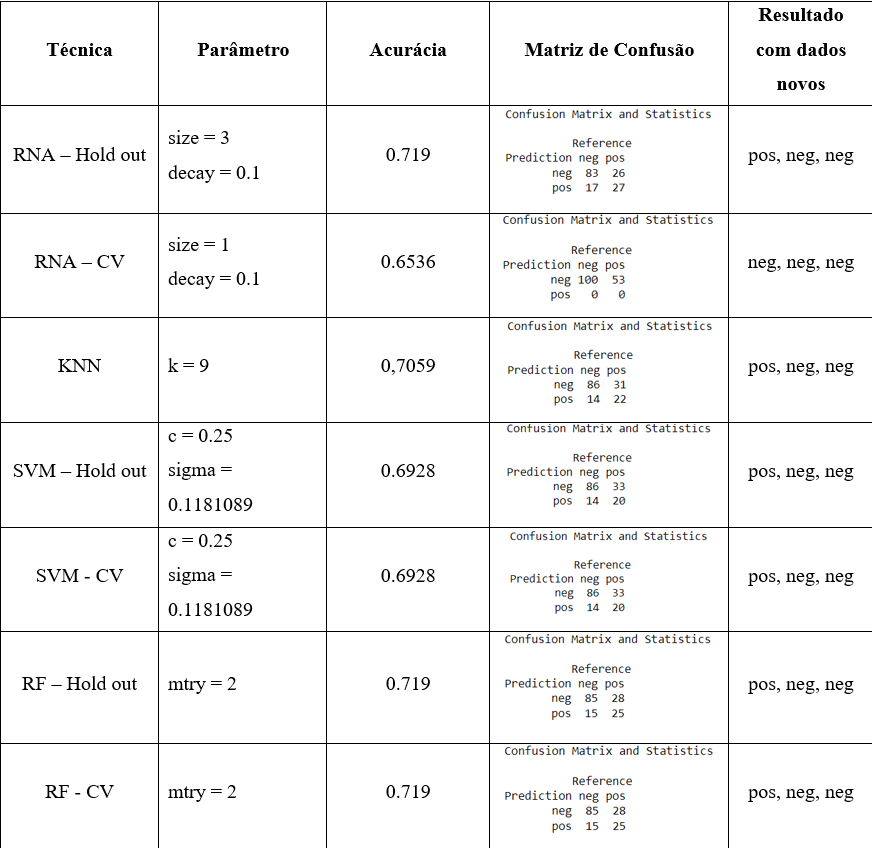

#### Listas de comandos usados, dados novos e resultados
Preparativos iniciais

In [54]:
#Importando biblioteca
library(caret)
library(mice)

#Criando dataFrame dos dados
dados_diabetes <- read.csv ("dados/Prática Diabetes-20220820/Material 03 - 9 – C - Diabetes - Dados.csv")


#Removendo identificador único
dados_diabetes$num <- NULL

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Separando dados de teste e de treino
indices_diabetes <- createDataPartition(dados_diabetes$diabetes, p=0.8, list=F)
treino_diabetes <- dados_diabetes[indices_diabetes,]
teste_diabetes <- dados_diabetes[-indices_diabetes,]

---

RNA - Hold out

In [55]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna <- train(diabetes ~., data = treino_diabetes, method = "nnet", trace=F)

#Exibindo resultado do treino
rna

Neural Network 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 615, 615, 615, 615, 615, 615, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa     
  1     0e+00  0.6510323  0.04165350
  1     1e-04  0.6619876  0.03989143
  1     1e-01  0.6813265  0.23851136
  3     0e+00  0.6525945  0.09687505
  3     1e-04  0.6489570  0.09482977
  3     1e-01  0.6892710  0.28776738
  5     0e+00  0.6533678  0.19345722
  5     1e-04  0.6520619  0.17064404
  5     1e-01  0.6883534  0.26192095

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 3 and decay = 0.1.

Temos **SIZE** = 3 e **DECAY** = 0.1

In [57]:
#Testando modelo treinado
predict.rna <- predict(rna, teste_diabetes)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna, as.factor(teste_diabetes$diabetes))

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  83  26
       pos  17  27
                                          
               Accuracy : 0.719           
                 95% CI : (0.6407, 0.7886)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 0.05152         
                                          
                  Kappa : 0.3535          
                                          
 Mcnemar's Test P-Value : 0.22247         
                                          
            Sensitivity : 0.8300          
            Specificity : 0.5094          
         Pos Pred Value : 0.7615          
         Neg Pred Value : 0.6136          
             Prevalence : 0.6536          
         Detection Rate : 0.5425          
   Detection Prevalence : 0.7124          
      Balanced Accuracy : 0.6697          
                                          
       'Positive' Class : neg             
                              

A **Acurácia** foi de **0.719**

**Resultado com novos dados**

In [58]:
#Adicionando dados novos
dados_novos_diabetes <- read.csv("dados/Prática Diabetes-20220820/Material 03 - 9 – C - Diabetes - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_diabetes$num <- NULL

#Realizando previsão com dados novos
resultado_diabetes_novos_rna <- predict(rna, dados_novos_diabetes)

#Removendo coluna de classe dos dados novos
dados_novos_diabetes$diabetes <- NULL

#Unindo dados novos com resultados da previsão
resultado_diabetes_novos_rna <- cbind(dados_novos_diabetes, resultado_diabetes_novos_rna)

#Exibindo resultado
print(resultado_diabetes_novos_rna)

  preg0nt glucose pressure triceps insulin mass pedigree age
1       7     130       72      37       0 33.6    0.980  50
2       2      81       66      29       0 32.6    0.351  31
3       5      23       64       0       0 23.3    0.672  15
  resultado_diabetes_novos_rna
1                          pos
2                          neg
3                          neg


O resultado com novos dados usando **RNA - Hold out** foi **pos, neg, neg**

---

RNA - CV

In [60]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna2 <- train(diabetes ~., data = treino_diabetes, method = "nnet", trace=F, trControl = ctrl)

#Exibindo resultado do treino
rna2

Neural Network 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 553, 554, 553, 553, 554, 553, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa     
  1     0e+00  0.6537282  0.05572899
  1     1e-04  0.6635643  0.07353429
  1     1e-01  0.7397409  0.35565942
  3     0e+00  0.6261502  0.02727668
  3     1e-04  0.6536753  0.12367102
  3     1e-01  0.7151507  0.33714259
  5     0e+00  0.6761237  0.24813166
  5     1e-04  0.7010312  0.27795312
  5     1e-01  0.7021417  0.31132069

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 1 and decay = 0.1.

Temos **SIZE** = 1 e **DECAY** = 0.1

In [61]:
#Testando modelo treinado
predict.rna2 <- predict(rna2, teste_diabetes)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna2, as.factor(teste_diabetes$diabetes))

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg 100  53
       pos   0   0
                                          
               Accuracy : 0.6536          
                 95% CI : (0.5725, 0.7286)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 0.5373          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 9.148e-13       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.6536          
         Neg Pred Value :    NaN          
             Prevalence : 0.6536          
         Detection Rate : 0.6536          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : neg             
                              

A **Acurácia** foi de **0.6536**

**Resultado com novos dados**

In [62]:
#Adicionando dados novos
dados_novos_diabetes <- read.csv("dados/Prática Diabetes-20220820/Material 03 - 9 – C - Diabetes - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_diabetes$num <- NULL

#Realizando previsão com dados novos
resultado_diabetes_novos_rna2 <- predict(rna2, dados_novos_diabetes)

#Removendo coluna de classe dos dados novos
dados_novos_diabetes$diabetes <- NULL

#Unindo dados novos com resultados da previsão
resultado_diabetes_novos_rna2 <- cbind(dados_novos_diabetes, resultado_diabetes_novos_rna2)

#Exibindo resultado
print(resultado_diabetes_novos_rna2)

  preg0nt glucose pressure triceps insulin mass pedigree age
1       7     130       72      37       0 33.6    0.980  50
2       2      81       66      29       0 32.6    0.351  31
3       5      23       64       0       0 23.3    0.672  15
  resultado_diabetes_novos_rna2
1                           neg
2                           neg
3                           neg


O resultado com novos dados usando **RNA - CV** foi **neg, neg, neg**

---

KNN

In [63]:
#Fazendo grid com valores de k para teste de melhor valor em KNN
tuneGrid <- expand.grid(k=c(1,3,5,7,9))

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
knn <- train(diabetes ~., data = treino_diabetes, method = "knn", tuneGrid = tuneGrid)

#Exibindo resultado do treino
knn

k-Nearest Neighbors 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 615, 615, 615, 615, 615, 615, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  1  0.6777493  0.2950175
  3  0.6798741  0.2980688
  5  0.6994436  0.3348826
  7  0.7134247  0.3616971
  9  0.7198249  0.3723600

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

O melhor valor para **K** é **9**

In [64]:
#Testando modelo treinado
predict.knn <- predict(knn, teste_diabetes)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.knn, as.factor(teste_diabetes$diabetes))

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  86  31
       pos  14  22
                                          
               Accuracy : 0.7059          
                 95% CI : (0.6269, 0.7767)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 0.10019         
                                          
                  Kappa : 0.2975          
                                          
 Mcnemar's Test P-Value : 0.01707         
                                          
            Sensitivity : 0.8600          
            Specificity : 0.4151          
         Pos Pred Value : 0.7350          
         Neg Pred Value : 0.6111          
             Prevalence : 0.6536          
         Detection Rate : 0.5621          
   Detection Prevalence : 0.7647          
      Balanced Accuracy : 0.6375          
                                          
       'Positive' Class : neg             
                              

A **Acurácia** foi de **0.7059**

**Resultado com novos dados**

In [65]:
#Adicionando dados novos
dados_novos_diabetes <- read.csv("dados/Prática Diabetes-20220820/Material 03 - 9 – C - Diabetes - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_diabetes$num <- NULL

#Realizando previsão com dados novos
resultado_diabetes_novos_knn <- predict(knn, dados_novos_diabetes)

#Removendo coluna de classe dos dados novos
dados_novos_diabetes$diabetes <- NULL

#Unindo dados novos com resultados da previsão
resultado_diabetes_novos_knn <- cbind(dados_novos_diabetes, resultado_diabetes_novos_knn)

#Exibindo resultado
print(resultado_diabetes_novos_knn)

  preg0nt glucose pressure triceps insulin mass pedigree age
1       7     130       72      37       0 33.6    0.980  50
2       2      81       66      29       0 32.6    0.351  31
3       5      23       64       0       0 23.3    0.672  15
  resultado_diabetes_novos_knn
1                          pos
2                          neg
3                          neg


O resultado com novos dados usando **KNN** foi **pos, neg, neg**

---

SVM - Hold out

In [66]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm <- train(diabetes ~., data = treino_diabetes, method = "svmRadial")

#Exibindo resultado do treino
svm

Support Vector Machines with Radial Basis Function Kernel 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 615, 615, 615, 615, 615, 615, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7691238  0.4643949
  0.50  0.7613613  0.4500285
  1.00  0.7532664  0.4351395

Tuning parameter 'sigma' was held constant at a value of 0.1181089
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.1181089 and C = 0.25.

Temos **C** = 0.25 e **SIGMA** = 0.1181089 

In [67]:
#Testando modelo treinado
predict.svm <- predict(svm, teste_diabetes)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm, as.factor(teste_diabetes$diabetes))

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  86  33
       pos  14  20
                                          
               Accuracy : 0.6928          
                 95% CI : (0.6132, 0.7648)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 0.17531         
                                          
                  Kappa : 0.2592          
                                          
 Mcnemar's Test P-Value : 0.00865         
                                          
            Sensitivity : 0.8600          
            Specificity : 0.3774          
         Pos Pred Value : 0.7227          
         Neg Pred Value : 0.5882          
             Prevalence : 0.6536          
         Detection Rate : 0.5621          
   Detection Prevalence : 0.7778          
      Balanced Accuracy : 0.6187          
                                          
       'Positive' Class : neg             
                              

A **Acurácia** foi de **0.6928**

**Resultado com novos dados**

In [68]:
#Adicionando dados novos
dados_novos_diabetes <- read.csv("dados/Prática Diabetes-20220820/Material 03 - 9 – C - Diabetes - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_diabetes$num <- NULL

#Realizando previsão com dados novos
resultado_diabetes_novos_svm <- predict(svm, dados_novos_diabetes)

#Removendo coluna de classe dos dados novos
dados_novos_diabetes$diabetes <- NULL

#Unindo dados novos com resultados da previsão
resultado_diabetes_novos_svm <- cbind(dados_novos_diabetes, resultado_diabetes_novos_svm)

#Exibindo resultado
print(resultado_diabetes_novos_svm)

  preg0nt glucose pressure triceps insulin mass pedigree age
1       7     130       72      37       0 33.6    0.980  50
2       2      81       66      29       0 32.6    0.351  31
3       5      23       64       0       0 23.3    0.672  15
  resultado_diabetes_novos_svm
1                          pos
2                          neg
3                          neg


O resultado com novos dados usando **SVM - Hold out** foi **pos, neg, neg**

---

SVM - CV

In [69]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm2 <- train(diabetes ~., data = treino_diabetes, method = "svmRadial", trControl = ctrl)

#Exibindo resultado do treino
svm2

Support Vector Machines with Radial Basis Function Kernel 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 553, 554, 553, 553, 554, 553, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7771285  0.4843549
  0.50  0.7754363  0.4825018
  1.00  0.7689318  0.4682035

Tuning parameter 'sigma' was held constant at a value of 0.1181089
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.1181089 and C = 0.25.

Temos **C** = 0.25 e **SIGMA** = 0.1181089 

In [70]:
#Testando modelo treinado
predict.svm2 <- predict(svm2, teste_diabetes)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm2, as.factor(teste_diabetes$diabetes))

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  86  33
       pos  14  20
                                          
               Accuracy : 0.6928          
                 95% CI : (0.6132, 0.7648)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 0.17531         
                                          
                  Kappa : 0.2592          
                                          
 Mcnemar's Test P-Value : 0.00865         
                                          
            Sensitivity : 0.8600          
            Specificity : 0.3774          
         Pos Pred Value : 0.7227          
         Neg Pred Value : 0.5882          
             Prevalence : 0.6536          
         Detection Rate : 0.5621          
   Detection Prevalence : 0.7778          
      Balanced Accuracy : 0.6187          
                                          
       'Positive' Class : neg             
                              

A **Acurácia** foi de **0.6928**


**Resultado com novos dados**


In [71]:
#Adicionando dados novos
dados_novos_diabetes <- read.csv("dados/Prática Diabetes-20220820/Material 03 - 9 – C - Diabetes - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_diabetes$num <- NULL

#Realizando previsão com dados novos
resultado_diabetes_novos_svm2 <- predict(svm2, dados_novos_diabetes)

#Removendo coluna de classe dos dados novos
dados_novos_diabetes$diabetes <- NULL

#Unindo dados novos com resultados da previsão
resultado_diabetes_novos_svm2 <- cbind(dados_novos_diabetes, resultado_diabetes_novos_svm2)

#Exibindo resultado
print(resultado_diabetes_novos_svm2)

  preg0nt glucose pressure triceps insulin mass pedigree age
1       7     130       72      37       0 33.6    0.980  50
2       2      81       66      29       0 32.6    0.351  31
3       5      23       64       0       0 23.3    0.672  15
  resultado_diabetes_novos_svm2
1                           pos
2                           neg
3                           neg


O resultado com novos dados usando **SVM - CV** foi **pos, neg, neg**

---

RF - Hold Out

In [72]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf <- train(diabetes ~., data = treino_diabetes, method = "rf")

#Exibindo resultado do treino
rf

Random Forest 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 615, 615, 615, 615, 615, 615, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.7617225  0.4588285
  5     0.7575020  0.4535877
  8     0.7504188  0.4381211

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Temos **mtry** = 2

In [73]:
#Testando modelo treinado
predict.rf <- predict(rf, teste_diabetes)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rf, as.factor(teste_diabetes$diabetes))

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  85  28
       pos  15  25
                                          
               Accuracy : 0.719           
                 95% CI : (0.6407, 0.7886)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 0.05152         
                                          
                  Kappa : 0.3414          
                                          
 Mcnemar's Test P-Value : 0.06725         
                                          
            Sensitivity : 0.8500          
            Specificity : 0.4717          
         Pos Pred Value : 0.7522          
         Neg Pred Value : 0.6250          
             Prevalence : 0.6536          
         Detection Rate : 0.5556          
   Detection Prevalence : 0.7386          
      Balanced Accuracy : 0.6608          
                                          
       'Positive' Class : neg             
                              

A **Acurácia** foi de **0.719**

**Resultado com novos dados**

In [78]:
#Adicionando dados novos
dados_novos_diabetes <- read.csv("dados/Prática Diabetes-20220820/Material 03 - 9 – C - Diabetes - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_diabetes$num <- NULL

#Realizando previsão com dados novos
resultado_diabetes_novos_rf <- predict(rf, dados_novos_diabetes)

#Removendo coluna de classe dos dados novos
dados_novos_diabetes$diabetes <- NULL

#Unindo dados novos com resultados da previsão
resultado_diabetes_novos_rf <- cbind(dados_novos_diabetes, resultado_diabetes_novos_rf)

#Exibindo resultado
print(resultado_diabetes_novos_rf)

  preg0nt glucose pressure triceps insulin mass pedigree age
1       7     130       72      37       0 33.6    0.980  50
2       2      81       66      29       0 32.6    0.351  31
3       5      23       64       0       0 23.3    0.672  15
  resultado_diabetes_novos_rf
1                         pos
2                         neg
3                         neg


O resultado com novos dados usando **RF - Hold out** foi **pos, neg, neg**

---

RF - CV

In [75]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf2 <- train(diabetes ~., data = treino_diabetes, method = "rf", trControl = ctrl)

#Exibindo resultado do treino
rf2

Random Forest 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 553, 554, 553, 553, 554, 553, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.7754363  0.4900107
  5     0.7739556  0.4923637
  8     0.7674775  0.4764259

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Temos **mtry** = 2

In [76]:
#Testando modelo treinado
predict.rf2 <- predict(rf2, teste_diabetes)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rf2, as.factor(teste_diabetes$diabetes))

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  85  28
       pos  15  25
                                          
               Accuracy : 0.719           
                 95% CI : (0.6407, 0.7886)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 0.05152         
                                          
                  Kappa : 0.3414          
                                          
 Mcnemar's Test P-Value : 0.06725         
                                          
            Sensitivity : 0.8500          
            Specificity : 0.4717          
         Pos Pred Value : 0.7522          
         Neg Pred Value : 0.6250          
             Prevalence : 0.6536          
         Detection Rate : 0.5556          
   Detection Prevalence : 0.7386          
      Balanced Accuracy : 0.6608          
                                          
       'Positive' Class : neg             
                              

A **Acurácia** foi de **0.719**

**Resultado com novos dados**

In [77]:
#Adicionando dados novos
dados_novos_diabetes <- read.csv("dados/Prática Diabetes-20220820/Material 03 - 9 – C - Diabetes - Dados - Novos Casos.csv")

#Removendo identificador único
dados_novos_diabetes$num <- NULL

#Realizando previsão com dados novos
resultado_diabetes_novos_rf2 <- predict(rf2, dados_novos_diabetes)

#Removendo coluna de classe dos dados novos
dados_novos_diabetes$diabetes <- NULL

#Unindo dados novos com resultados da previsão
resultado_diabetes_novos_rf2 <- cbind(dados_novos_diabetes, resultado_diabetes_novos_rf2)

#Exibindo resultado
print(resultado_diabetes_novos_rf2)

  preg0nt glucose pressure triceps insulin mass pedigree age
1       7     130       72      37       0 33.6    0.980  50
2       2      81       66      29       0 32.6    0.351  31
3       5      23       64       0       0 23.3    0.672  15
  resultado_diabetes_novos_rf2
1                          pos
2                          neg
3                          neg


O resultado com novos dados usando **RF - CV** foi **van, van, saab**

#### Tabela de resultados de Banco

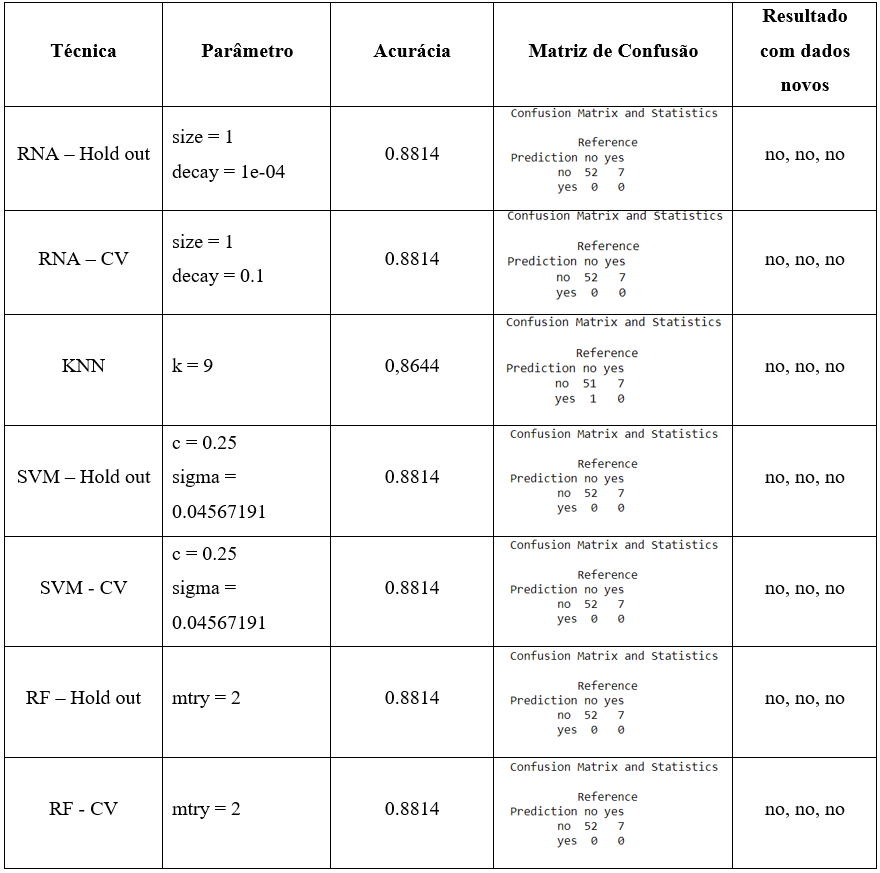

---

#### Listas de comandos usados, dados novos e resultados
Preparativos iniciais

In [79]:
#Importando biblioteca
library(caret)

#Criando dataFrame dos dados
dados_banco <- read.csv ("dados/Prática Banco-20220820/Material 03 - 11 – Banco - Dados.csv")

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Separando dados de teste e de treino
indices_banco <- createDataPartition(dados_banco$y, p=0.8, list=F)
treino_banco <- dados_banco[indices_banco,]
teste_banco <- dados_banco[-indices_banco,]

---

RNA - Hold out

In [80]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna <- train(y ~., data = treino_banco, method = "nnet", trace=F)

#Exibindo resultado do treino
rna

Neural Network 

241 samples
  8 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 241, 241, 241, 241, 241, 241, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa       
  1     0e+00  0.8709966  -0.001621200
  1     1e-04  0.8718955   0.000000000
  1     1e-01  0.8673654  -0.006625672
  3     0e+00  0.8620808   0.009535641
  3     1e-04  0.8678632  -0.003191247
  3     1e-01  0.8491790   0.038622817
  5     0e+00  0.8691729  -0.004460783
  5     1e-04  0.8648113  -0.001533381
  5     1e-01  0.8363351   0.025598913

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 1 and decay = 1e-04.

Temos **SIZE** = 1 e **DECAY** = 1e-04

In [81]:
#Testando modelo treinado
predict.rna <- predict(rna, teste_banco)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna, as.factor(teste_banco$y))

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  52   7
       yes  0   0
                                          
               Accuracy : 0.8814          
                 95% CI : (0.7707, 0.9509)
    No Information Rate : 0.8814          
    P-Value [Acc > NIR] : 0.59891         
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.02334         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8814          
         Neg Pred Value :    NaN          
             Prevalence : 0.8814          
         Detection Rate : 0.8814          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : no              
                                 

A **Acurácia** foi de **0.8814**

**Resultado com novos dados**

In [82]:
#Adicionando dados novos
dados_novos_banco <- read.csv("dados/Prática Banco-20220820/Material 03 - 11 – Banco - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_banco_novos_rna <- predict(rna, dados_novos_banco)

#Removendo coluna de classe dos dados novos
dados_novos_banco$y <- NULL

#Unindo dados novos com resultados da previsão
resultado_banco_novos_rna <- cbind(dados_novos_banco, resultado_banco_novos_rna)

#Exibindo resultado
print(resultado_banco_novos_rna)

  age        job marital education default balance housing loan
1  60 unemployed married   primary      no    2000     yes  yes
2  33   services married secondary     yes    3000     yes   no
3  15 management  single  tertiary      no    1350     yes   no
  resultado_banco_novos_rna
1                        no
2                        no
3                        no


O resultado com novos dados usando **RNA - Hold out** foi **no, no, no**

---

RNA - CV

In [83]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna2 <- train(y ~., data = treino_banco, method = "nnet", trace=F, trControl = ctrl)

#Exibindo resultado do treino
rna2

Neural Network 

241 samples
  8 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 217, 217, 217, 217, 217, 217, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa       
  1     0e+00  0.8715000   0.000000000
  1     1e-04  0.8715000   0.000000000
  1     1e-01  0.8715000   0.000000000
  3     0e+00  0.8715000   0.000000000
  3     1e-04  0.8591667  -0.017948718
  3     1e-01  0.8340000  -0.018571429
  5     0e+00  0.8673333  -0.006666667
  5     1e-04  0.8590000  -0.020000000
  5     1e-01  0.8301667  -0.027337124

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 1 and decay = 0.1.

Temos **SIZE** = 1 e **DECAY** = 0.1

In [84]:
#Testando modelo treinado
predict.rna2 <- predict(rna2, teste_banco)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna2, as.factor(teste_banco$y))

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  52   7
       yes  0   0
                                          
               Accuracy : 0.8814          
                 95% CI : (0.7707, 0.9509)
    No Information Rate : 0.8814          
    P-Value [Acc > NIR] : 0.59891         
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.02334         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8814          
         Neg Pred Value :    NaN          
             Prevalence : 0.8814          
         Detection Rate : 0.8814          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : no              
                                 

A **Acurácia** foi de **0.8814**

**Resultado com novos dados**

In [85]:
#Adicionando dados novos
dados_novos_banco <- read.csv("dados/Prática Banco-20220820/Material 03 - 11 – Banco - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_banco_novos_rna2 <- predict(rna2, dados_novos_banco)

#Removendo coluna de classe dos dados novos
dados_novos_banco$y <- NULL

#Unindo dados novos com resultados da previsão
resultado_banco_novos_rna2 <- cbind(dados_novos_banco, resultado_banco_novos_rna2)

#Exibindo resultado
print(resultado_banco_novos_rna2)

  age        job marital education default balance housing loan
1  60 unemployed married   primary      no    2000     yes  yes
2  33   services married secondary     yes    3000     yes   no
3  15 management  single  tertiary      no    1350     yes   no
  resultado_banco_novos_rna2
1                         no
2                         no
3                         no


O resultado com novos dados usando **RNA - CV** foi **no, no, no**

---

KNN

In [86]:
#Fazendo grid com valores de k para teste de melhor valor em KNN
tuneGrid <- expand.grid(k=c(1,3,5,7,9))

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
knn <- train(y ~., data = treino_banco, method = "knn", tuneGrid = tuneGrid)

#Exibindo resultado do treino
knn

k-Nearest Neighbors 

241 samples
  8 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 241, 241, 241, 241, 241, 241, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa     
  1  0.7910405  0.05870291
  3  0.8024664  0.04131839
  5  0.8248073  0.04108729
  7  0.8375531  0.04141843
  9  0.8483143  0.07547554

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

O melhor valor para **K** é **9**

In [87]:
#Testando modelo treinado
predict.knn <- predict(knn, teste_banco)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.knn, as.factor(teste_banco$y))

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  51   7
       yes  1   0
                                          
               Accuracy : 0.8644          
                 95% CI : (0.7502, 0.9396)
    No Information Rate : 0.8814          
    P-Value [Acc > NIR] : 0.7378          
                                          
                  Kappa : -0.0306         
                                          
 Mcnemar's Test P-Value : 0.0771          
                                          
            Sensitivity : 0.9808          
            Specificity : 0.0000          
         Pos Pred Value : 0.8793          
         Neg Pred Value : 0.0000          
             Prevalence : 0.8814          
         Detection Rate : 0.8644          
   Detection Prevalence : 0.9831          
      Balanced Accuracy : 0.4904          
                                          
       'Positive' Class : no              
                                 

A **Acurácia** foi de **0.8644**

**Resultado com novos dados**

In [88]:
#Adicionando dados novos
dados_novos_banco <- read.csv("dados/Prática Banco-20220820/Material 03 - 11 – Banco - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_banco_novos_knn <- predict(knn, dados_novos_banco)

#Removendo coluna de classe dos dados novos
dados_novos_banco$y <- NULL

#Unindo dados novos com resultados da previsão
resultado_banco_novos_knn <- cbind(dados_novos_banco, resultado_banco_novos_knn)

#Exibindo resultado
print(resultado_banco_novos_knn)

  age        job marital education default balance housing loan
1  60 unemployed married   primary      no    2000     yes  yes
2  33   services married secondary     yes    3000     yes   no
3  15 management  single  tertiary      no    1350     yes   no
  resultado_banco_novos_knn
1                        no
2                        no
3                        no


O resultado com novos dados usando **KNN** foi **no, no, no**

---

SVM - Hold out

In [93]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm <- train(y ~., data = treino_banco, method = "svmRadial")

#Exibindo resultado do treino
svm



Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Vari

Support Vector Machines with Radial Basis Function Kernel 

241 samples
  8 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 241, 241, 241, 241, 241, 241, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa      
  0.25  0.8718955  0.000000000
  0.50  0.8700784  0.006861209
  1.00  0.8643717  0.005972460

Tuning parameter 'sigma' was held constant at a value of 0.04567191
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.04567191 and C = 0.25.

Temos **C** = 0.25 e **SIGMA** = 0.04567191 

In [94]:
#Testando modelo treinado
predict.svm <- predict(svm, teste_banco)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm, as.factor(teste_banco$y))

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  52   7
       yes  0   0
                                          
               Accuracy : 0.8814          
                 95% CI : (0.7707, 0.9509)
    No Information Rate : 0.8814          
    P-Value [Acc > NIR] : 0.59891         
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.02334         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8814          
         Neg Pred Value :    NaN          
             Prevalence : 0.8814          
         Detection Rate : 0.8814          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : no              
                                 

A **Acurácia** foi de **0.8814**

**Resultado com novos dados**

In [95]:
#Adicionando dados novos
dados_novos_banco <- read.csv("dados/Prática Banco-20220820/Material 03 - 11 – Banco - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_banco_novos_svm <- predict(svm, dados_novos_banco)

#Removendo coluna de classe dos dados novos
dados_novos_banco$y <- NULL

#Unindo dados novos com resultados da previsão
resultado_banco_novos_svm <- cbind(dados_novos_banco, resultado_banco_novos_svm)

#Exibindo resultado
print(resultado_banco_novos_svm)

  age        job marital education default balance housing loan
1  60 unemployed married   primary      no    2000     yes  yes
2  33   services married secondary     yes    3000     yes   no
3  15 management  single  tertiary      no    1350     yes   no
  resultado_banco_novos_svm
1                        no
2                        no
3                        no


O resultado com novos dados usando **SVM - Hold out** foi **no, no, no**

---

SVM - CV

In [96]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm2 <- train(y ~., data = treino_banco, method = "svmRadial", trControl = ctrl)

#Exibindo resultado do treino
svm2

Support Vector Machines with Radial Basis Function Kernel 

241 samples
  8 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 217, 217, 217, 217, 217, 217, ... 
Resampling results across tuning parameters:

  C     Accuracy  Kappa
  0.25  0.8715    0    
  0.50  0.8715    0    
  1.00  0.8715    0    

Tuning parameter 'sigma' was held constant at a value of 0.04567191
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.04567191 and C = 0.25.

Temos **C** = 0.25 e **SIGMA** = 0.04567191 

In [97]:
#Testando modelo treinado
predict.svm2 <- predict(svm2, teste_banco)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm2, as.factor(teste_banco$y))

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  52   7
       yes  0   0
                                          
               Accuracy : 0.8814          
                 95% CI : (0.7707, 0.9509)
    No Information Rate : 0.8814          
    P-Value [Acc > NIR] : 0.59891         
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.02334         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8814          
         Neg Pred Value :    NaN          
             Prevalence : 0.8814          
         Detection Rate : 0.8814          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : no              
                                 

A **Acurácia** foi de **0.8814**

**Resultado com novos dados**

In [99]:
#Adicionando dados novos
dados_novos_banco <- read.csv("dados/Prática Banco-20220820/Material 03 - 11 – Banco - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_banco_novos_svm2 <- predict(svm2, dados_novos_banco)

#Removendo coluna de classe dos dados novos
dados_novos_banco$y <- NULL

#Unindo dados novos com resultados da previsão
resultado_banco_novos_svm2 <- cbind(dados_novos_banco, resultado_banco_novos_svm2)

#Exibindo resultado
print(resultado_banco_novos_svm2)

  age        job marital education default balance housing loan
1  60 unemployed married   primary      no    2000     yes  yes
2  33   services married secondary     yes    3000     yes   no
3  15 management  single  tertiary      no    1350     yes   no
  resultado_banco_novos_svm2
1                         no
2                         no
3                         no


O resultado com novos dados usando **SVM - CV** foi **no, no, no**

---

RF - Hold Out

In [100]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf <- train(y ~., data = treino_banco, method = "rf")

#Exibindo resultado do treino
rf

Random Forest 

241 samples
  8 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 241, 241, 241, 241, 241, 241, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa     
   2    0.8718955  0.00000000
  11    0.8417424  0.05995246
  21    0.8249566  0.05151260

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Temos **mtry** = 2

In [101]:
#Testando modelo treinado
predict.rf <- predict(rf, teste_banco)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rf, as.factor(teste_banco$y))

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  52   7
       yes  0   0
                                          
               Accuracy : 0.8814          
                 95% CI : (0.7707, 0.9509)
    No Information Rate : 0.8814          
    P-Value [Acc > NIR] : 0.59891         
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.02334         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8814          
         Neg Pred Value :    NaN          
             Prevalence : 0.8814          
         Detection Rate : 0.8814          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : no              
                                 

A **Acurácia** foi de **0.7126**

**Resultado com novos dados**

In [102]:
#Adicionando dados novos
dados_novos_banco <- read.csv("dados/Prática Banco-20220820/Material 03 - 11 – Banco - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_banco_novos_rf <- predict(rf, dados_novos_banco)

#Removendo coluna de classe dos dados novos
dados_novos_banco$y <- NULL

#Unindo dados novos com resultados da previsão
resultado_banco_novos_rf <- cbind(dados_novos_banco, resultado_banco_novos_rf)

#Exibindo resultado
print(resultado_banco_novos_rf)

  age        job marital education default balance housing loan
1  60 unemployed married   primary      no    2000     yes  yes
2  33   services married secondary     yes    3000     yes   no
3  15 management  single  tertiary      no    1350     yes   no
  resultado_banco_novos_rf
1                       no
2                       no
3                       no


O resultado com novos dados usando **RF - Hold out** foi **no, no, no**

---

RF - CV

In [103]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf2 <- train(y ~., data = treino_banco, method = "rf", trControl = ctrl)

#Exibindo resultado do treino
rf2

Random Forest 

241 samples
  8 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 217, 217, 217, 217, 217, 217, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8715000  0.0000000
  11    0.8671667  0.1381197
  21    0.8548333  0.1309287

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Temos **mtry** = 2

In [104]:
#Testando modelo treinado
predict.rf2 <- predict(rf2, teste_banco)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rf2, as.factor(teste_banco$y))

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  52   7
       yes  0   0
                                          
               Accuracy : 0.8814          
                 95% CI : (0.7707, 0.9509)
    No Information Rate : 0.8814          
    P-Value [Acc > NIR] : 0.59891         
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.02334         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8814          
         Neg Pred Value :    NaN          
             Prevalence : 0.8814          
         Detection Rate : 0.8814          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : no              
                                 

A **Acurácia** foi de **0.8814**

**Resultado com novos dados**

In [105]:
#Adicionando dados novos
dados_novos_banco <- read.csv("dados/Prática Banco-20220820/Material 03 - 11 – Banco - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_banco_novos_rf2 <- predict(rf2, dados_novos_banco)

#Removendo coluna de classe dos dados novos
dados_novos_banco$y <- NULL

#Unindo dados novos com resultados da previsão
resultado_banco_novos_rf2 <- cbind(dados_novos_banco, resultado_banco_novos_rf2)

#Exibindo resultado
print(resultado_banco_novos_rf2)

  age        job marital education default balance housing loan
1  60 unemployed married   primary      no    2000     yes  yes
2  33   services married secondary     yes    3000     yes   no
3  15 management  single  tertiary      no    1350     yes   no
  resultado_banco_novos_rf2
1                        no
2                        no
3                        no


O resultado com novos dados usando **RF - CV** foi **no, no, no**

---

#### Tabela de resultados de Previsão do tempo

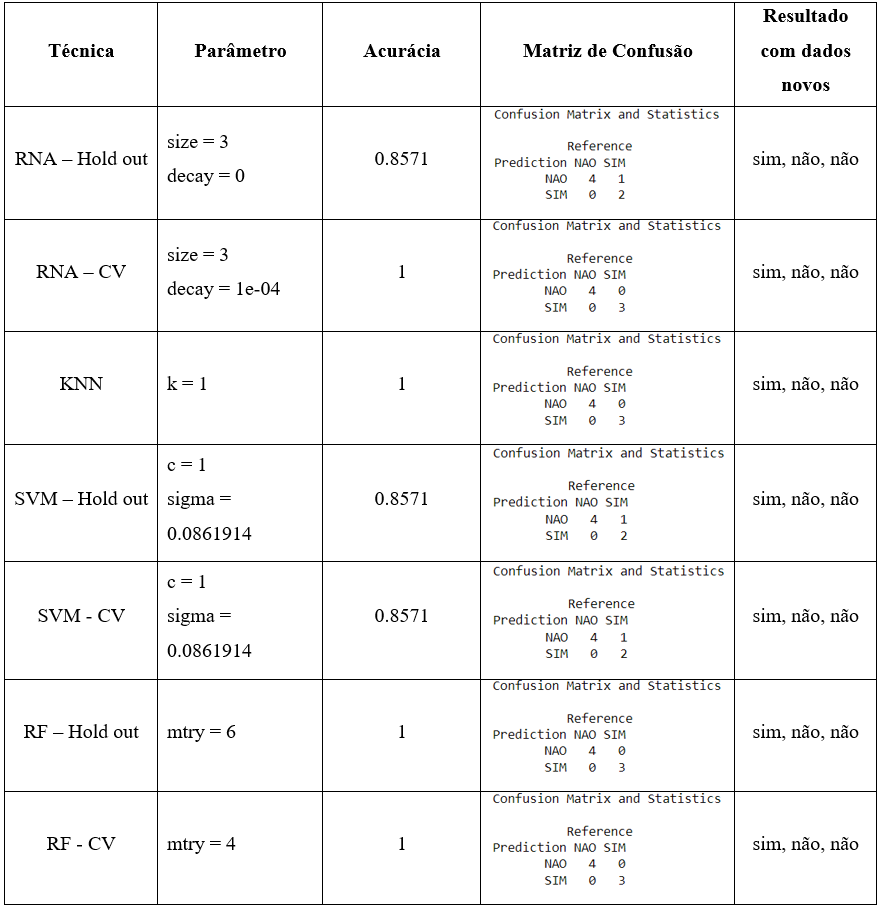

---

#### Listas de comandos usados, dados novos e resultados
Preparativos iniciais

In [107]:
#Importando biblioteca
library(caret)

#Criando dataFrame dos dados
dados_tempo <- read.csv ("dados/Prática Previsão do Tempo-20220820/Material 03 - 6 - C - Previsao do Tempo - Dados.csv")

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Separando dados de teste e de treino
indices_tempo <- createDataPartition(dados_tempo$Chovera, p=0.8, list=F)
treino_tempo <- dados_tempo[indices_tempo,]
teste_tempo <- dados_tempo[-indices_tempo,]

---

RNA - Hold out

In [108]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna <- train(Chovera ~., data = treino_tempo, method = "nnet", trace=F)

#Exibindo resultado do treino
rna

Neural Network 

32 samples
 4 predictor
 2 classes: 'NAO', 'SIM' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
  1     0e+00  0.8975294  0.7748200
  1     1e-04  0.8872552  0.7610336
  1     1e-01  0.8572350  0.6973586
  3     0e+00  0.9242344  0.8417154
  3     1e-04  0.8991795  0.7946129
  3     1e-01  0.8572350  0.6973586
  5     0e+00  0.9235245  0.8429275
  5     1e-04  0.8846154  0.7663230
  5     1e-01  0.8572350  0.6973586

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 3 and decay = 0.

Temos **SIZE** = 3 e **DECAY** = 0

In [109]:
#Testando modelo treinado
predict.rna <- predict(rna, teste_tempo)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna, as.factor(teste_tempo$Chovera))

Confusion Matrix and Statistics

          Reference
Prediction NAO SIM
       NAO   4   1
       SIM   0   2
                                          
               Accuracy : 0.8571          
                 95% CI : (0.4213, 0.9964)
    No Information Rate : 0.5714          
    P-Value [Acc > NIR] : 0.1243          
                                          
                  Kappa : 0.6957          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.6667          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5714          
         Detection Rate : 0.5714          
   Detection Prevalence : 0.7143          
      Balanced Accuracy : 0.8333          
                                          
       'Positive' Class : NAO             
                              

A **Acurácia** foi de **0.491**

**Resultado com novos dados**

In [110]:
#Adicionando dados novos
dados_novos_tempo <- read.csv("dados/Prática Previsão do Tempo-20220820/Material 03 - 6 - C - Previsao do Tempo - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_tempo_novos_rna <- predict(rna, dados_novos_tempo)

#Removendo coluna de classe dos dados novos
dados_novos_tempo$Chovera <- NULL

#Unindo dados novos com resultados da previsão
resultado_tempo_novos_rna <- cbind(dados_novos_tempo, resultado_tempo_novos_rna)

#Exibindo resultado
print(resultado_tempo_novos_rna)

         Ceu Temperatura Umidade Vento resultado_tempo_novos_rna
1 Ensolarado     Elevada    Alta   Sim                       SIM
2    Chuvoso     Elevada  Normal   Sim                       NAO
3    Coberto     Elevada    Alta   Nao                       NAO


O resultado com novos dados usando **RNA - Hold out** foi **sim, não, não**

---

RNA - CV

In [111]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna2 <- train(Chovera ~., data = treino_tempo, method = "nnet", trace=F, trControl = ctrl)

#Exibindo resultado do treino
rna2

Neural Network 

32 samples
 4 predictor
 2 classes: 'NAO', 'SIM' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 29, 29, 29, 29, 29, 29, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa
  1     0e+00  0.9333333  0.8  
  1     1e-04  0.9666667  0.9  
  1     1e-01  0.9333333  0.8  
  3     0e+00  1.0000000  1.0  
  3     1e-04  1.0000000  1.0  
  3     1e-01  0.9333333  0.8  
  5     0e+00  1.0000000  1.0  
  5     1e-04  1.0000000  1.0  
  5     1e-01  0.9333333  0.8  

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 3 and decay = 1e-04.

Temos **SIZE** = 3 e **DECAY** = 1e-04

In [112]:
#Testando modelo treinado
predict.rna2 <- predict(rna2, teste_tempo)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rna2, as.factor(teste_tempo$Chovera))

Confusion Matrix and Statistics

          Reference
Prediction NAO SIM
       NAO   4   0
       SIM   0   3
                                     
               Accuracy : 1          
                 95% CI : (0.5904, 1)
    No Information Rate : 0.5714     
    P-Value [Acc > NIR] : 0.01989    
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5714     
         Detection Rate : 0.5714     
   Detection Prevalence : 0.5714     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : NAO        
                                     

A **Acurácia** foi de **1**

**Resultado com novos dados**

In [113]:
#Adicionando dados novos
dados_novos_tempo <- read.csv("dados/Prática Previsão do Tempo-20220820/Material 03 - 6 - C - Previsao do Tempo - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_tempo_novos_rna2 <- predict(rna2, dados_novos_tempo)

#Removendo coluna de classe dos dados novos
dados_novos_tempo$Chovera <- NULL

#Unindo dados novos com resultados da previsão
resultado_tempo_novos_rna2 <- cbind(dados_novos_tempo, resultado_tempo_novos_rna2)

#Exibindo resultado
print(resultado_tempo_novos_rna2)

         Ceu Temperatura Umidade Vento resultado_tempo_novos_rna2
1 Ensolarado     Elevada    Alta   Sim                        SIM
2    Chuvoso     Elevada  Normal   Sim                        NAO
3    Coberto     Elevada    Alta   Nao                        NAO


O resultado com novos dados usando **RNA - CV** foi **sim, não, não**

---

KNN

In [114]:
#Fazendo grid com valores de k para teste de melhor valor em KNN
tuneGrid <- expand.grid(k=c(1,3,5,7,9))

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
knn <- train(Chovera ~., data = treino_tempo, method = "knn", tuneGrid = tuneGrid)

#Exibindo resultado do treino
knn

k-Nearest Neighbors 

32 samples
 4 predictor
 2 classes: 'NAO', 'SIM' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  1  0.8819833  0.7598329
  3  0.7385972  0.4514910
  5  0.7220952  0.4352566
  7  0.7317893  0.4367849
  9  0.7385224  0.4253850

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

O melhor valor para **K** é **1**

In [115]:
#Testando modelo treinado
predict.knn <- predict(knn, teste_tempo)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.knn, as.factor(teste_tempo$Chovera))

Confusion Matrix and Statistics

          Reference
Prediction NAO SIM
       NAO   4   0
       SIM   0   3
                                     
               Accuracy : 1          
                 95% CI : (0.5904, 1)
    No Information Rate : 0.5714     
    P-Value [Acc > NIR] : 0.01989    
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5714     
         Detection Rate : 0.5714     
   Detection Prevalence : 0.5714     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : NAO        
                                     

A **Acurácia** foi de **0.6527**

**Resultado com novos dados**

In [116]:
#Adicionando dados novos
dados_novos_tempo <- read.csv("dados/Prática Previsão do Tempo-20220820/Material 03 - 6 - C - Previsao do Tempo - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_tempo_novos_knn <- predict(knn, dados_novos_tempo)

#Removendo coluna de classe dos dados novos
dados_novos_tempo$Chovera <- NULL

#Unindo dados novos com resultados da previsão
resultado_tempo_novos_knn <- cbind(dados_novos_tempo, resultado_tempo_novos_knn)

#Exibindo resultado
print(resultado_tempo_novos_knn)

         Ceu Temperatura Umidade Vento resultado_tempo_novos_knn
1 Ensolarado     Elevada    Alta   Sim                       SIM
2    Chuvoso     Elevada  Normal   Sim                       NAO
3    Coberto     Elevada    Alta   Nao                       NAO


O resultado com novos dados usando **KNN** foi **sim, não, não**

---

SVM - Hold out


In [117]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm <- train(Chovera ~., data = treino_tempo, method = "svmRadial")

#Exibindo resultado do treino
svm

Support Vector Machines with Radial Basis Function Kernel 

32 samples
 4 predictor
 2 classes: 'NAO', 'SIM' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7931557  0.5060426
  0.50  0.8639305  0.6798406
  1.00  0.8652667  0.7140161

Tuning parameter 'sigma' was held constant at a value of 0.0861914
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.0861914 and C = 1.

Temos **C** = 1 e **SIGMA** = 0.0861914 

In [118]:
#Testando modelo treinado
predict.svm <- predict(svm, teste_tempo)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm, as.factor(teste_tempo$Chovera))

Confusion Matrix and Statistics

          Reference
Prediction NAO SIM
       NAO   4   1
       SIM   0   2
                                          
               Accuracy : 0.8571          
                 95% CI : (0.4213, 0.9964)
    No Information Rate : 0.5714          
    P-Value [Acc > NIR] : 0.1243          
                                          
                  Kappa : 0.6957          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.6667          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5714          
         Detection Rate : 0.5714          
   Detection Prevalence : 0.7143          
      Balanced Accuracy : 0.8333          
                                          
       'Positive' Class : NAO             
                              

A **Acurácia** foi de **0.8571**

**Resultado com novos dados**

In [119]:
#Adicionando dados novos
dados_novos_tempo <- read.csv("dados/Prática Previsão do Tempo-20220820/Material 03 - 6 - C - Previsao do Tempo - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_tempo_novos_svm <- predict(svm, dados_novos_tempo)

#Removendo coluna de classe dos dados novos
dados_novos_tempo$Chovera <- NULL

#Unindo dados novos com resultados da previsão
resultado_tempo_novos_svm <- cbind(dados_novos_tempo, resultado_tempo_novos_svm)

#Exibindo resultado
print(resultado_tempo_novos_svm)

         Ceu Temperatura Umidade Vento resultado_tempo_novos_svm
1 Ensolarado     Elevada    Alta   Sim                       SIM
2    Chuvoso     Elevada  Normal   Sim                       NAO
3    Coberto     Elevada    Alta   Nao                       NAO


O resultado com novos dados usando **SVM - Hold out** foi **sim, não, não**

---

SVM - CV

In [120]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm2 <- train(Chovera ~., data = treino_tempo, method = "svmRadial", trControl = ctrl)

#Exibindo resultado do treino
svm2

Support Vector Machines with Radial Basis Function Kernel 

32 samples
 4 predictor
 2 classes: 'NAO', 'SIM' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 29, 29, 29, 29, 29, 29, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa
  0.25  0.8166667  0.5  
  0.50  0.8666667  0.6  
  1.00  0.9333333  0.8  

Tuning parameter 'sigma' was held constant at a value of 0.0861914
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.0861914 and C = 1.

Temos **C** = 1 e **SIGMA** = 0.0861914 

In [121]:
#Testando modelo treinado
predict.svm2 <- predict(svm2, teste_tempo)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.svm2, as.factor(teste_tempo$Chovera))

Confusion Matrix and Statistics

          Reference
Prediction NAO SIM
       NAO   4   1
       SIM   0   2
                                          
               Accuracy : 0.8571          
                 95% CI : (0.4213, 0.9964)
    No Information Rate : 0.5714          
    P-Value [Acc > NIR] : 0.1243          
                                          
                  Kappa : 0.6957          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.6667          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5714          
         Detection Rate : 0.5714          
   Detection Prevalence : 0.7143          
      Balanced Accuracy : 0.8333          
                                          
       'Positive' Class : NAO             
                              

A **Acurácia** foi de **0.7725**

**Resultado com novos dados**

In [122]:
#Adicionando dados novos
dados_novos_tempo <- read.csv("dados/Prática Previsão do Tempo-20220820/Material 03 - 6 - C - Previsao do Tempo - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_tempo_novos_svm2 <- predict(svm2, dados_novos_tempo)

#Removendo coluna de classe dos dados novos
dados_novos_tempo$Chovera <- NULL

#Unindo dados novos com resultados da previsão
resultado_tempo_novos_svm2 <- cbind(dados_novos_tempo, resultado_tempo_novos_svm2)

#Exibindo resultado
print(resultado_tempo_novos_svm2)

         Ceu Temperatura Umidade Vento resultado_tempo_novos_svm2
1 Ensolarado     Elevada    Alta   Sim                        SIM
2    Chuvoso     Elevada  Normal   Sim                        NAO
3    Coberto     Elevada    Alta   Nao                        NAO


O resultado com novos dados usando **SVM - CV** foi **sim, não, não**

---

RF - Hold Out

In [123]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf <- train(Chovera ~., data = treino_tempo, method = "rf")

#Exibindo resultado do treino
rf

Random Forest 

32 samples
 4 predictor
 2 classes: 'NAO', 'SIM' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8738382  0.7327536
  4     0.8701585  0.7297186
  6     0.8766154  0.7498092

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 6.

Temos **mtry** = 6

In [124]:
#Testando modelo treinado
predict.rf <- predict(rf, teste_tempo)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rf, as.factor(teste_tempo$Chovera))

Confusion Matrix and Statistics

          Reference
Prediction NAO SIM
       NAO   4   0
       SIM   0   3
                                     
               Accuracy : 1          
                 95% CI : (0.5904, 1)
    No Information Rate : 0.5714     
    P-Value [Acc > NIR] : 0.01989    
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5714     
         Detection Rate : 0.5714     
   Detection Prevalence : 0.5714     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : NAO        
                                     

A **Acurácia** foi de **0.7126**

**Resultado com novos dados**

In [125]:
#Adicionando dados novos
dados_novos_tempo <- read.csv("dados/Prática Previsão do Tempo-20220820/Material 03 - 6 - C - Previsao do Tempo - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_tempo_novos_rf <- predict(rf, dados_novos_tempo)

#Removendo coluna de classe dos dados novos
dados_novos_tempo$Chovera <- NULL

#Unindo dados novos com resultados da previsão
resultado_tempo_novos_rf <- cbind(dados_novos_tempo, resultado_tempo_novos_rf)

#Exibindo resultado
print(resultado_tempo_novos_rf)

         Ceu Temperatura Umidade Vento resultado_tempo_novos_rf
1 Ensolarado     Elevada    Alta   Sim                      SIM
2    Chuvoso     Elevada  Normal   Sim                      NAO
3    Coberto     Elevada    Alta   Nao                      NAO


O resultado com novos dados usando **RF - Hold out** foi **sim, não, Não**

---

RF - CV

In [126]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf2 <- train(Chovera ~., data = treino_tempo, method = "rf", trControl = ctrl)

#Exibindo resultado do treino
rf2

Random Forest 

32 samples
 4 predictor
 2 classes: 'NAO', 'SIM' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 29, 29, 29, 29, 29, 29, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa
  2     0.9333333  0.8  
  4     1.0000000  1.0  
  6     1.0000000  1.0  

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.

Temos **mtry** = 4

In [127]:
#Testando modelo treinado
predict.rf2 <- predict(rf2, teste_tempo)

#Exibindo Matrix de confusão do resultado
confusionMatrix(predict.rf2, as.factor(teste_tempo$Chovera))


Confusion Matrix and Statistics

          Reference
Prediction NAO SIM
       NAO   4   0
       SIM   0   3
                                     
               Accuracy : 1          
                 95% CI : (0.5904, 1)
    No Information Rate : 0.5714     
    P-Value [Acc > NIR] : 0.01989    
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5714     
         Detection Rate : 0.5714     
   Detection Prevalence : 0.5714     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : NAO        
                                     

A **Acurácia** foi de **0.7246**

**Resultado com novos dados**

In [128]:
#Adicionando dados novos
dados_novos_tempo <- read.csv("dados/Prática Previsão do Tempo-20220820/Material 03 - 6 - C - Previsao do Tempo - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_tempo_novos_rf2 <- predict(rf2, dados_novos_tempo)

#Removendo coluna de classe dos dados novos
dados_novos_tempo$Chovera <- NULL

#Unindo dados novos com resultados da previsão
resultado_tempo_novos_rf2 <- cbind(dados_novos_tempo, resultado_tempo_novos_rf2)

#Exibindo resultado
print(resultado_tempo_novos_rf2)

         Ceu Temperatura Umidade Vento resultado_tempo_novos_rf2
1 Ensolarado     Elevada    Alta   Sim                       SIM
2    Chuvoso     Elevada  Normal   Sim                       NAO
3    Coberto     Elevada    Alta   Nao                       NAO


O resultado com novos dados usando **RF - CV** foi **sim, não, não**

---

#### Análise ROC dos resultados obtidos na tabela de Diabetes

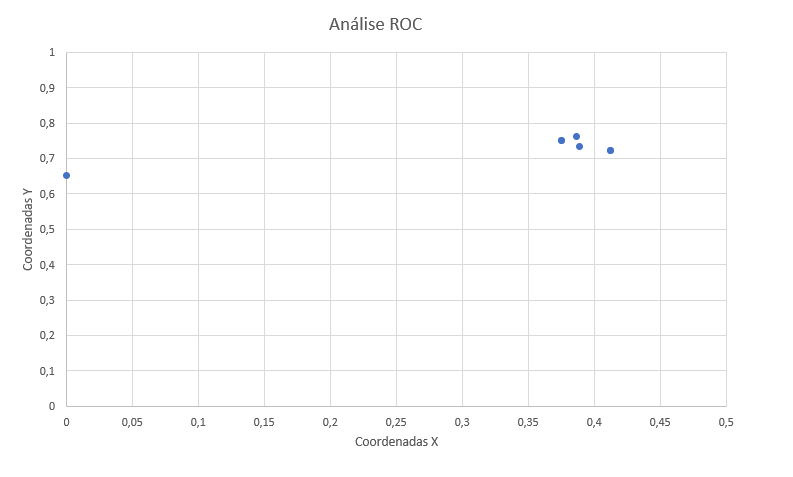

In [135]:
#Criando data frame de distâncias do Céu ROC
distancias.df <- data.frame("Técnica"=c("RNA - HO", "RNA - CV", "KNN", "SVM = HO", "SVM - CV", "RF - HO", "RF - CV"), 
                    "Distância"=c(0.45406,0.34641,0.47057,0.49644,0.49644,0.44947,0.449470))
distancias.df

Técnica,Distância
RNA - HO,0.45406
RNA - CV,0.34641
KNN,0.47057
SVM = HO,0.49644
SVM - CV,0.49644
RF - HO,0.44947
RF - CV,0.44947


In [149]:
#Verificando técnica com menor distância

tec_menor_dist <- distancias.df[which ( distancias.df$Distância == min(distancias.df$Distância)),]
tec_menor_dist

,Técnica,Distância
2,RNA - CV,0.34641


De acordo com Análise ROC, a técnina **RNA - CV** é a melhor técnica para ser utilizada para predição de classificação de diabetes, pois está mais próxima do "Céu ROC".

---

### Regressão

#### Tabela de resultados de biomassa

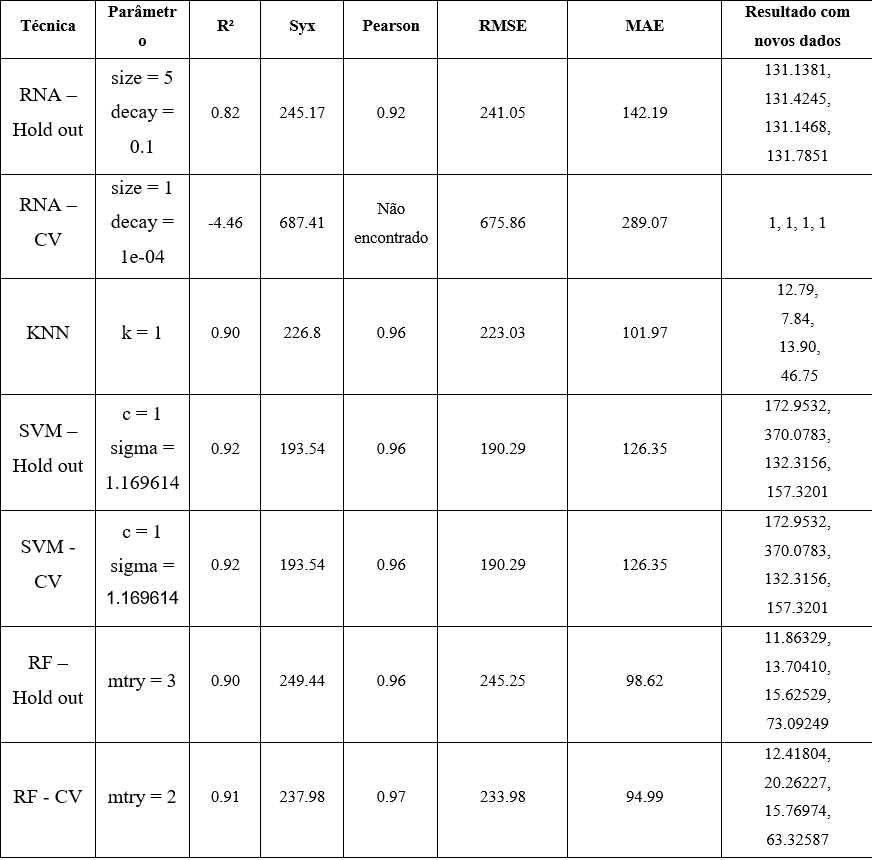

---

#### Listas de comandos usados, dados novos e resultados

Preparativos iniciais

In [2]:
#Importando biblioteca
library(mlbench) 
library(caret) 
library(mice)
library(Metrics)

#Criando funções
r2 <- function(valor_observado, valor_predito){
    return(1-(sum((valor_predito-valor_observado)^2)/sum((valor_predito-mean(valor_observado))^2)))
} # Quanto mais perto de 1 melhor

syx <- function(valor_observado, valor_predito){
    return(sqrt(sum((valor_observado-valor_predito)^2)/(length(valor_observado)-2)))
} # Quanto mais perto de 0 melhor

mae <- function(valor_observado, valor_predito){
    return (sum(abs(valor_predito-valor_observado))/length(valor_observado))
} ## Quanto mais perto de 0 melhor

#Criando dataFrame dos dados
dados_biomassa <- read.csv ("dados/Prática Biomassa-20220903/Material 02 - 4 - R - Biomassa - Dados.csv")

#Removendo identificador único
#dados_veiculos$a <- NULL

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Separando dados de teste e de treino
indices_biomassa <- createDataPartition(dados_biomassa$biomassa, p=0.8, list=F)
treino_biomassa <- dados_biomassa[indices_biomassa,]
teste_biomassa <- dados_biomassa[-indices_biomassa,]

---

RNA - Hold out

In [16]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna <- train(biomassa ~., data = treino_biomassa, method = "nnet", linout=T, trace=F)

#Exibindo resultado do treino
rna

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

Neural Network 

240 samples
  3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 240, 240, 240, 240, 240, 240, ... 
Resampling results across tuning parameters:

  size  decay  RMSE       Rsquared   MAE     
  1     0e+00  1210.9481  0.4120447  521.2586
  1     1e-04  1278.0271  0.2580294  552.1924
  1     1e-01   990.8136  0.6747793  380.1402
  3     0e+00  1251.3336  0.6345408  540.4184
  3     1e-04  1257.4172  0.4305980  557.8986
  3     1e-01   830.8448  0.6961048  272.3015
  5     0e+00  1206.7947  0.3600218  518.1434
  5     1e-04  1395.8668  0.2604744  551.4985
  5     1e-01   825.4827  0.6714505  278.6740

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were size = 5 and decay = 0.1.

Temos **SIZE** = 5 e **DECAY** = 0.1

In [20]:
#Testando modelo treinado
predict.rna <- predict(rna, teste_biomassa)


**Usando R² para medir a qualidade do modelo**

In [18]:
#r2
r2(teste_biomassa$biomassa, predict.rna)

[1] 0.8200164

O **R²** foi de **0.82001641764945**

**Usando SYX para medir a qualidade do modelo**

In [21]:
#syx
syx(teste_biomassa$biomassa, predict.rna)

[1] 245.1695

O **SYX** foi de **245.169547134819**

**Usando Pearson para medir a qualidade do modelo**

In [22]:
#pearson
cor.test(teste_biomassa$biomassa, predict.rna, method = "pearson")


	Pearson's product-moment correlation

data:  teste_biomassa$biomassa and predict.rna
t = 17.753, df = 58, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8675248 0.9510053
sample estimates:
      cor 
0.9190055 


A correlação usando **Pearson** foi de **0.9190055**

**Usando RMSE para medir a qualidade do modelo**

In [23]:
#rmse
rmse(teste_biomassa$biomassa, predict.rna)

[1] 241.0488

O **RMSE** foi de **241.048757061476**

**Usando MAE para medir a qualidade do modelo**

In [24]:
#MAE
mae(teste_biomassa$biomassa, predict.rna)

[1] 142.1946

O **MAE** foi de **142.194551533152**

**Resultado com novos dados**

In [25]:
#Adicionando dados de veículos novos
dados_novos_biomassa <- read.csv("dados/Prática Biomassa-20220903/Material 02 - 4 - R - Biomassa - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_biomassa_novos_rna <- predict(rna, dados_novos_biomassa)

#Removendo coluna de classe dos dados novos
dados_novos_biomassa$biomassa <- NULL

#Unindo dados novos com resultados da previsão
resultado_biomassa_novos_rna <- cbind(dados_novos_biomassa, resultado_biomassa_novos_rna)

#Exibindo resultado
print(resultado_biomassa_novos_rna)

   dap    h   Me resultado_biomassa_novos_rna
1  6.4  7.0 1.04                     131.1381
2  7.3 10.0 1.04                     131.4245
3  7.8  5.5 1.04                     131.1468
4 12.2  7.5 1.04                     131.7851


O resultado com novos dados usando **RNA - Hold out** foi **131.1381, 131.4245, 131.4245, 131.7851**

---

RNA - CV

In [26]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna2 <- train(biomassa ~., data = treino_biomassa, method = "nnet", trace=F, trControl = ctrl)

#Exibindo resultado do treino
rna2

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

Neural Network 

240 samples
  3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 216, 216, 216, 216, 216, 216, ... 
Resampling results across tuning parameters:

  size  decay  RMSE    Rsquared    MAE     
  1     0e+00  1245.9         NaN  425.1606
  1     1e-04  1245.9         NaN  425.1606
  1     1e-01  1245.9  0.11629368  425.1606
  3     0e+00  1245.9         NaN  425.1606
  3     1e-04  1245.9         NaN  425.1606
  3     1e-01  1245.9  0.05474368  425.1606
  5     0e+00  1245.9         NaN  425.1606
  5     1e-04  1245.9         NaN  425.1606
  5     1e-01  1245.9  0.21987652  425.1606

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were size = 1 and decay = 1e-04.

Temos **SIZE** = 1 e **DECAY** = 1e-04

In [27]:
#Testando modelo treinado
predict.rna2 <- predict(rna2, teste_biomassa)

**Usando R² para medir a qualidade do modelo**

In [28]:
#r2
r2(teste_biomassa$biomassa, predict.rna2)

[1] -4.46649

O **R²** foi de **-4.46649042458886**

**Usando SYX para medir a qualidade do modelo**

In [32]:
syx(teste_biomassa$biomassa, predict.rna2)

[1] 687.4157

O **SYX** foi de **687.415701068765**

**Usando Pearson para medir a qualidade do modelo**

In [33]:
cor.test(teste_biomassa$biomassa, predict.rna2, method = "pearson")

Warning message in cor(x, y):
"o desvio padrão é zero"


	Pearson's product-moment correlation

data:  teste_biomassa$biomassa and predict.rna2
t = NA, df = 58, p-value = NA
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 NA NA
sample estimates:
cor 
 NA 


A correlação usando **Pearson** de desvio padrão zero

**Usando RMSE para medir a qualidade do modelo**

In [39]:
#rmse
rmse(teste_biomassa$biomassa, predict.rna2)

[1] 675.8617

O **RMSE** foi de **675.861673130432**

**Usando MAE para medir a qualidade do modelo**

In [38]:
#MAE
mae(teste_biomassa$biomassa, predict.rna2)

[1] 289.0703

O **MAE** foi de **289.070333333333**

**Resultado com novos dados**

In [37]:
#Adicionando dados de veículos novos
dados_novos_biomassa <- read.csv("dados/Prática Biomassa-20220903/Material 02 - 4 - R - Biomassa - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_biomassa_novos_rna2 <- predict(rna2, dados_novos_biomassa)

#Removendo coluna de classe dos dados novos
dados_novos_biomassa$biomassa <- NULL

#Unindo dados novos com resultados da previsão
resultado_biomassa_novos_rna2 <- cbind(dados_novos_biomassa, resultado_biomassa_novos_rna2)

#Exibindo resultado
print(resultado_biomassa_novos_rna2)

   dap    h   Me resultado_biomassa_novos_rna2
1  6.4  7.0 1.04                             1
2  7.3 10.0 1.04                             1
3  7.8  5.5 1.04                             1
4 12.2  7.5 1.04                             1


O resultado com novos dados usando RNA - CV out foi 1, 1, 1, 1.

---

KNN

In [122]:
#Fazendo grid com valores de k para teste de melhor valor em KNN
tuneGrid <- expand.grid(k=c(1,3,5,7,9))

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
knn <- train(biomassa ~., data = treino_biomassa, method = "knn", tuneGrid = tuneGrid)

#Exibindo resultado do treino
knn

k-Nearest Neighbors 

240 samples
  3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 240, 240, 240, 240, 240, 240, ... 
Resampling results across tuning parameters:

  k  RMSE      Rsquared   MAE     
  1  669.4956  0.8595547  154.6253
  3  678.5122  0.8695257  154.9200
  5  695.9967  0.8539387  154.6685
  7  713.2067  0.8376084  155.0631
  9  734.6701  0.8282184  156.3005

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 1.

O melhor valor para **K** é **1**

In [123]:
#Testando modelo treinado
predict.knn <- predict(knn, teste_biomassa)

**Usando R² para medir a qualidade do modelo**

In [126]:
#r2
r2(teste_biomassa$biomassa, predict.knn)

[1] 0.9065285

O **R²** foi de **0.906528474877551**

**Usando SYX para medir a qualidade do modelo**

In [127]:
#syx
syx(teste_biomassa$biomassa, predict.knn)

[1] 226.8482

O **SYX** foi de **226.848214733081**

**Usando Pearson para medir a qualidade do modelo**

In [128]:
cor.test(teste_biomassa$biomassa, predict.knn, method = "pearson")


	Pearson's product-moment correlation

data:  teste_biomassa$biomassa and predict.knn
t = 26.303, df = 58, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9345682 0.9763360
sample estimates:
      cor 
0.9605458 


A correlação usando **Pearson** foi de **0.9605458**

**Usando RMSE para medir a qualidade do modelo**

In [129]:
#rmse
rmse(teste_biomassa$biomassa, predict.knn)

[1] 223.0354

O **RMSE** foi de **223.035368144457**

**Usando MAE para medir a qualidade do modelo**

In [130]:
#MAE
mae(teste_biomassa$biomassa, predict.knn)

[1] 101.975

O **MAE** foi de **142.194551533152**

**Resultado com novos dados**

In [131]:
#Adicionando dados de veículos novos
dados_novos_biomassa <- read.csv("dados/Prática Biomassa-20220903/Material 02 - 4 - R - Biomassa - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_biomassa_novos_knn <- predict(knn, dados_novos_biomassa)

#Removendo coluna de classe dos dados novos
dados_novos_biomassa$biomassa <- NULL

#Unindo dados novos com resultados da previsão
resultado_biomassa_novos_knn <- cbind(dados_novos_biomassa, resultado_biomassa_novos_knn)

#Exibindo resultado
print(resultado_biomassa_novos_knn)

   dap    h   Me resultado_biomassa_novos_knn
1  6.4  7.0 1.04                        12.79
2  7.3 10.0 1.04                         7.84
3  7.8  5.5 1.04                        13.90
4 12.2  7.5 1.04                        46.75


O resultado com novos dados usando **KNN** foi **12.79, 7.84, 13.90, 46.75**

---

SVM - Hold out


In [133]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm <- train(biomassa ~., data = treino_biomassa, method = "svmRadial")

#Exibindo resultado do treino
svm

Support Vector Machines with Radial Basis Function Kernel 

240 samples
  3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 240, 240, 240, 240, 240, 240, ... 
Resampling results across tuning parameters:

  C     RMSE       Rsquared   MAE     
  0.25  1070.7753  0.4835183  293.8823
  0.50  1023.6491  0.5324012  272.8006
  1.00   984.0747  0.5684716  260.9587

Tuning parameter 'sigma' was held constant at a value of 1.169614
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 1.169614 and C = 1.

Temos **C** = 1 e **SIGMA** = 1.169614

In [135]:
#Testando modelo treinado
predict.svm <- predict(svm, teste_biomassa)

**Usando R² para medir a qualidade do modelo**

In [138]:
#r2
r2(teste_biomassa$biomassa, predict.svm)

[1] 0.9159207

O **R²** foi de **0.915920735276678**

**Usando SYX para medir a qualidade do modelo**

In [139]:
#syx
syx(teste_biomassa$biomassa, predict.svm)

[1] 193.5452

O **SYX** foi de **193.54522634665**

**Usando Pearson para medir a qualidade do modelo**

In [140]:
cor.test(teste_biomassa$biomassa, predict.svm, method = "pearson")


	Pearson's product-moment correlation

data:  teste_biomassa$biomassa and predict.svm
t = 28.629, df = 58, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9441530 0.9798661
sample estimates:
      cor 
0.9663914 


A correlação usando **Pearson** foi de **0.9663914**

**Usando RMSE para medir a qualidade do modelo**

In [141]:
#rmse
rmse(teste_biomassa$biomassa, predict.svm)

[1] 190.2921

O **RMSE** foi de **190.292133714253**

**Usando MAE para medir a qualidade do modelo**

In [142]:
#MAE
mae(teste_biomassa$biomassa, predict.svm)

[1] 126.3556

O **MAE** foi de **126.355626250494**

**Resultado com novos dados**

In [143]:
#Adicionando dados de veículos novos
dados_novos_biomassa <- read.csv("dados/Prática Biomassa-20220903/Material 02 - 4 - R - Biomassa - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_biomassa_novos_svm <- predict(svm, dados_novos_biomassa)

#Removendo coluna de classe dos dados novos
dados_novos_biomassa$biomassa <- NULL

#Unindo dados novos com resultados da previsão
resultado_biomassa_novos_svm <- cbind(dados_novos_biomassa, resultado_biomassa_novos_svm)

#Exibindo resultado
print(resultado_biomassa_novos_svm)

   dap    h   Me resultado_biomassa_novos_svm
1  6.4  7.0 1.04                     172.9532
2  7.3 10.0 1.04                     370.0783
3  7.8  5.5 1.04                     132.3156
4 12.2  7.5 1.04                     157.3201


O resultado com novos dados usando **SVM - Hold out** foi **172.9532, 370.0783, 132.3156, 157.3201**

---

SVM - CV

In [144]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
svm2 <- train(biomassa ~., data = treino_biomassa, method = "svmRadial", trControl = ctrl)

#Exibindo resultado do treino
svm2

Support Vector Machines with Radial Basis Function Kernel 

240 samples
  3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 216, 216, 216, 216, 216, 216, ... 
Resampling results across tuning parameters:

  C     RMSE      Rsquared   MAE     
  0.25  970.3172  0.6658394  306.1346
  0.50  921.5841  0.7137676  284.0418
  1.00  856.3591  0.7561131  266.1886

Tuning parameter 'sigma' was held constant at a value of 1.169614
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 1.169614 and C = 1.

Temos **C** = 1 e **SIGMA** = 1.169614

In [146]:
#Testando modelo treinado
predict.svm2 <- predict(svm2, teste_biomassa)

**Usando R² para medir a qualidade do modelo**

In [147]:
#r2
r2(teste_biomassa$biomassa, predict.svm2)

[1] 0.9159207

O **R²** foi de **0.915920735276678**

**Usando SYX para medir a qualidade do modelo**

In [149]:
#syx
syx(teste_biomassa$biomassa, predict.svm2)

[1] 193.5452

O **SYX** foi de **193.54522634665**

**Usando Pearson para medir a qualidade do modelo**

In [150]:
cor.test(teste_biomassa$biomassa, predict.svm2, method = "pearson")


	Pearson's product-moment correlation

data:  teste_biomassa$biomassa and predict.svm2
t = 28.629, df = 58, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9441530 0.9798661
sample estimates:
      cor 
0.9663914 


A correlação usando **Pearson** foi de **0.9663914**

**Usando RMSE para medir a qualidade do modelo**

In [151]:
#rmse
rmse(teste_biomassa$biomassa, predict.svm2)

[1] 190.2921

O **RMSE** foi de **190.292133714253**

**Usando MAE para medir a qualidade do modelo**

In [152]:
#MAE
mae(teste_biomassa$biomassa, predict.svm2)

[1] 126.3556

O **MAE** foi de **126.355626250494**

**Resultado com novos dados**

In [153]:
#Adicionando dados de veículos novos
dados_novos_biomassa <- read.csv("dados/Prática Biomassa-20220903/Material 02 - 4 - R - Biomassa - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_biomassa_novos_svm2 <- predict(svm2, dados_novos_biomassa)

#Removendo coluna de classe dos dados novos
dados_novos_biomassa$biomassa <- NULL

#Unindo dados novos com resultados da previsão
resultado_biomassa_novos_svm2 <- cbind(dados_novos_biomassa, resultado_biomassa_novos_svm2)

#Exibindo resultado
print(resultado_biomassa_novos_svm2)

   dap    h   Me resultado_biomassa_novos_svm2
1  6.4  7.0 1.04                      172.9532
2  7.3 10.0 1.04                      370.0783
3  7.8  5.5 1.04                      132.3156
4 12.2  7.5 1.04                      157.3201


O resultado com novos dados usando **SVM - CV** foi **172.9532, 370.0783, 132.3156, 157.3201**

---

RF - Hold Out

In [154]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf <- train(biomassa ~., data = treino_biomassa, method = "rf")

#Exibindo resultado do treino
rf

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Random Forest 

240 samples
  3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 240, 240, 240, 240, 240, 240, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     585.8773  0.9139586  130.6817
  3     585.1893  0.9064533  133.3432

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 3.

Temos **mtry** = 3

In [156]:
#Testando modelo treinado
predict.rf <- predict(rf, teste_biomassa)

**Usando R² para medir a qualidade do modelo**

In [157]:
#r2
r2(teste_biomassa$biomassa, predict.rf)

[1] 0.8978337

O **R²** foi de **0.89783373542443**

**Usando SYX para medir a qualidade do modelo**

In [158]:
#syx
syx(teste_biomassa$biomassa, predict.rf)

[1] 249.4416

O **SYX** foi de **249.441603487056**

**Usando Pearson para medir a qualidade do modelo**

In [159]:
cor.test(teste_biomassa$biomassa, predict.rf, method = "pearson")


	Pearson's product-moment correlation

data:  teste_biomassa$biomassa and predict.rf
t = 27.835, df = 58, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9411295 0.9787550
sample estimates:
      cor 
0.9645499 


A correlação usando **Pearson** foi de **0.9645499 **

**Usando RMSE para medir a qualidade do modelo**

In [160]:
#rmse
rmse(teste_biomassa$biomassa, predict.rf)

[1] 245.249

O **RMSE** foi de **245.249009033378**

**Usando MAE para medir a qualidade do modelo**

In [161]:
#MAE
mae(teste_biomassa$biomassa, predict.rf)

[1] 98.61599

O **MAE** foi de **98.6159879944447**

**Resultado com novos dados**

In [162]:
#Adicionando dados de veículos novos
dados_novos_biomassa <- read.csv("dados/Prática Biomassa-20220903/Material 02 - 4 - R - Biomassa - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_biomassa_novos_rf <- predict(rf, dados_novos_biomassa)

#Removendo coluna de classe dos dados novos
dados_novos_biomassa$biomassa <- NULL

#Unindo dados novos com resultados da previsão
resultado_biomassa_novos_rf <- cbind(dados_novos_biomassa, resultado_biomassa_novos_rf)

#Exibindo resultado
print(resultado_biomassa_novos_rf)

   dap    h   Me resultado_biomassa_novos_rf
1  6.4  7.0 1.04                    11.86329
2  7.3 10.0 1.04                    13.70410
3  7.8  5.5 1.04                    15.62529
4 12.2  7.5 1.04                    73.09249


O resultado com novos dados usando **RF - Hold out** foi **11.86329, 13.70410, 15.62529, 73.09249**

---

RF - CV

In [163]:
#Criando a variavel de controle para o método CV,
# usando 10 folders
ctrl <- trainControl(method = "cv", number = 10)

#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rf2 <- train(biomassa ~., data = treino_biomassa, method = "rf", trControl = ctrl)

#Exibindo resultado do treino
rf2

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Random Forest 

240 samples
  3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 216, 216, 216, 216, 216, 216, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     418.6219  0.9458091  119.8995
  3     434.6402  0.9371676  124.8950

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.

Temos **mtry** = 2

In [165]:
#Testando modelo treinado
predict.rf2 <- predict(rf2, teste_biomassa)

**Usando R² para medir a qualidade do modelo**

In [166]:
#r2
r2(teste_biomassa$biomassa, predict.rf2)

[1] 0.9064196

O **R²** foi de **0.906419575465029**

**Usando SYX para medir a qualidade do modelo**

In [167]:
#syx
syx(teste_biomassa$biomassa, predict.rf2)

[1] 237.984

O **SYX** foi de **237.983970923478**

**Usando Pearson para medir a qualidade do modelo**

In [168]:
cor.test(teste_biomassa$biomassa, predict.rf2, method = "pearson")


	Pearson's product-moment correlation

data:  teste_biomassa$biomassa and predict.rf2
t = 29.973, df = 58, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9487782 0.9815616
sample estimates:
     cor 
0.969204 


A correlação usando **Pearson** foi de **0.969204 **

**Usando RMSE para medir a qualidade do modelo**

In [169]:
#rmse
rmse(teste_biomassa$biomassa, predict.rf2)

[1] 233.984

O **RMSE** foi de **233.983955438452**

**Usando MAE para medir a qualidade do modelo**

In [170]:
#MAE
mae(teste_biomassa$biomassa, predict.rf2)

[1] 94.98842

O **MAE** foi de **94.9884225907411**

**Resultado com novos dados**

In [171]:
#Adicionando dados de veículos novos
dados_novos_biomassa <- read.csv("dados/Prática Biomassa-20220903/Material 02 - 4 - R - Biomassa - Dados - Novos Casos.csv")

#Realizando previsão com dados novos
resultado_biomassa_novos_rf2 <- predict(rf2, dados_novos_biomassa)

#Removendo coluna de classe dos dados novos
dados_novos_biomassa$biomassa <- NULL

#Unindo dados novos com resultados da previsão
resultado_biomassa_novos_rf2 <- cbind(dados_novos_biomassa, resultado_biomassa_novos_rf2)

#Exibindo resultado
print(resultado_biomassa_novos_rf2)

   dap    h   Me resultado_biomassa_novos_rf2
1  6.4  7.0 1.04                     12.41804
2  7.3 10.0 1.04                     20.26227
3  7.8  5.5 1.04                     15.76974
4 12.2  7.5 1.04                     63.32587


O resultado com novos dados usando **RF - CV** foi **12.41804, 20.26227, 15.76974, 63.32587**

---

#### Tabela de resultados de Admissão

---

#### Listas de comandos usados, dados novos e resultados

Preparativos iniciais

In [173]:
#Importando biblioteca
library(mlbench) 
library(caret) 
library(mice)
library(Metrics)

#Criando funções
r2 <- function(valor_observado, valor_predito){
    return(1-(sum((valor_predito-valor_observado)^2)/sum((valor_predito-mean(valor_observado))^2)))
} # Quanto mais perto de 1 melhor

syx <- function(valor_observado, valor_predito){
    return(sqrt(sum((valor_observado-valor_predito)^2)/(length(valor_observado)-2)))
} # Quanto mais perto de 0 melhor

mae <- function(valor_observado, valor_predito){
    return (sum(abs(valor_predito-valor_observado))/length(valor_observado))
} ## Quanto mais perto de 0 melhor

#Criando dataFrame dos dados
dados_admissao <- read.csv ("dados/Prática Admissão-20220903/Material 03 - 8 – R - Admissao - Dados.csv")

#Removendo identificador único
dados_admissao$Serial.No. <- NULL

#Aplicando semente para dados pseudo-aleatórios
#set.seed(85941)

#Separando dados de teste e de treino
indices_admissao <- createDataPartition(dados_biomassa$biomassa, p=0.8, list=F)
treino_admissao <- dados_admissao[indices_admissao,]
teste_admissao <- dados_admissao[-indices_admissao,]

---

RNA - Hold out

In [175]:
#Aplicando semente para dados pseudo-aleatórios
set.seed(85941)

#Realizando treinamento com dados de treino
rna <- train(ChanceOfAdmit ~., data = treino_admissao, method = "nnet", linout=T, trace=F)

#Exibindo resultado do treino
rna

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

Neural Network 

240 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 240, 240, 240, 240, 240, 240, ... 
Resampling results across tuning parameters:

  size  decay  RMSE        Rsquared     MAE       
  1     0e+00  0.14482232  0.001493895  0.11637690
  1     1e-04  0.11231984  0.697348335  0.08720132
  1     1e-01  0.08598162  0.654980150  0.06652640
  3     0e+00  0.14482231  0.038339805  0.11637689
  3     1e-04  0.10151494  0.552482732  0.07776714
  3     1e-01  0.08371195  0.671702353  0.06456085
  5     0e+00  0.14203991  0.308122058  0.11418779
  5     1e-04  0.08640322  0.676879590  0.06549508
  5     1e-01  0.08200850  0.685162148  0.06304258

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were size = 5 and decay = 0.1.

Temos **SIZE** = 5 e **DECAY** = 0.1

In [176]:
#Testando modelo treinado
predict.rna <- predict(rna, teste_admissao)

**Usando R² para medir a qualidade do modelo**

In [181]:
#r2
r2(teste_admissao$ChanceOfAdmit, predict.rna)

[1] 0.7220462

O **R²** foi de **0.72204617219632**

**Usando SYX para medir a qualidade do modelo**

In [182]:
#syx
syx(teste_admissao$ChanceOfAdmit, predict.rna)

[1] 0.06231327

O **SYX** foi de **245.169547134819**

**Usando Pearson para medir a qualidade do modelo**

In [183]:
cor.test(teste_admissao$ChanceOfAdmit, predict.rna, method = "pearson")


	Pearson's product-moment correlation

data:  teste_admissao$ChanceOfAdmit and predict.rna
t = 32.069, df = 258, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8667414 0.9161219
sample estimates:
      cor 
0.8941173 


A correlação usando **Pearson** foi de **0.8941173**

**Usando RMSE para medir a qualidade do modelo**

In [185]:
#rmse
rmse(teste_admissao$ChanceOfAdmit, predict.rna)

[1] 0.06207314

O **RMSE** foi de **0.0620731443806822**

**Usando MAE para medir a qualidade do modelo**

In [187]:
#MAE
mae(teste_admissao$ChanceOfAdmit, predict.rna)

[1] 0.04708524

O **MAE** foi de **0.0470852398480719**

**Resultado com novos dados**

In [189]:
#Adicionando dados de veículos novos
dados_novos_admissao <- read.csv("dados/Prática Admissão-20220903/Material 06 - 8 – R - Admissao - Novos Casos.csv")

#Removendo identificador único
dados_novos_admissao$num <- NULL

#Realizando previsão com dados novos
resultado_admissao_novos_rna <- predict(rna, dados_novos_admissao)

#Removendo coluna de classe dos dados novos
dados_novos_admissao$ChanceOfAdmit <- NULL

#Unindo dados novos com resultados da previsão
resultado_admissao_novos_rna <- cbind(dados_novos_admissao, resultado_admissao_novos_rna)

#Exibindo resultado
print(resultado_admissao_novos_rna)

  GRE.Score TOEFL.Score University.Rating SOP LOR CGPA Research
1       212         118                 4 4.5 4.5 7.65        1
2       324          58                 4 4.0 4.5 2.87        1
3       200         104                 3 3.0 3.5 8.00        1
  resultado_admissao_novos_rna
1                    0.9156687
2                   -0.2412329
3                    0.8892601


O resultado com novos dados usando **RNA - Hold out** foi **0.9156687, -0.2412329, 0.8892601**

---

RNA - CV

#### Tabela de resultados de Alunos do Ensino Médio

### Agrupamento

#### Íris

In [47]:
#carregando dados
data(iris)
dados_iris <- iris
head(dados_iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [48]:
#trantando dados removendo o que não é número
dados_iris_number <- dados_iris
dados_iris_number$Species <- NULL

#definindo semente pseudo-aleatória
set.seed(85941)

#utilizando k-means para agrupar dados
irisCluster <- kmeans(dados_iris_number,3)
irisCluster

K-means clustering with 3 clusters of sizes 96, 33, 21

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.314583    2.895833     4.973958   1.7031250
2     5.175758    3.624242     1.472727   0.2727273
3     4.738095    2.904762     1.790476   0.3523810

Clustering vector:
  [1] 2 3 3 3 2 2 2 2 3 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 3 3 2 2 2 3 2 2
 [38] 2 3 2 2 3 3 2 2 3 2 3 2 2 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

Within cluster sum of squares by cluster:
[1] 118.651875   6.432121  17.669524
 (between_SS / total_SS =  79.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [49]:
#exibindo resultado das 10 primeiras linhas com o cluster correspondente
resultado_iris <- cbind(dados_iris, irisCluster$cluster)
head(resultado_iris,10)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,irisCluster$cluster
5.1,3.5,1.4,0.2,setosa,2
4.9,3.0,1.4,0.2,setosa,3
4.7,3.2,1.3,0.2,setosa,3
4.6,3.1,1.5,0.2,setosa,3
5.0,3.6,1.4,0.2,setosa,2
5.4,3.9,1.7,0.4,setosa,2
4.6,3.4,1.4,0.3,setosa,2
5.0,3.4,1.5,0.2,setosa,2
4.4,2.9,1.4,0.2,setosa,3
4.9,3.1,1.5,0.1,setosa,3


#### Móveis

In [50]:
#carregando dados
dados_moveis <- read.csv ("dados/Material 07 - 2 - Moveis - Dados.csv")
head(dados_moveis)

categoria,cor,estilo
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Azul/Branco Linho,tradicional
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Rosa/Azul,tradicional
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Azul/Branco Linho,tradicional
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Rosa/Azul,tradicional
Quarto Infantil / Comoda,Branco Linho Gelo/Azul/Branco Linho,tradicional
Quarto Infantil / Comoda,Branco Linho Gelo/Rosa/Azul,tradicional


In [55]:
#importando biblioteca de agrupamento para palavras
library(klaR)

#definindo semente pseudo-aleatória
set.seed(85941)

#utilizando k-means para agrupar dados
moveisCluster <- kmodes(dados_moveis,5)
moveisCluster

K-modes clustering with 5 clusters of sizes 103, 19, 16, 293, 23

Cluster modes:
                                                           categoria
1 Quarto do Bebe / Guarda-roupas / Guarda-roupas com portas de bater
2                      Sala de Estar / Racks para TV / Racks para TV
3                      Sala de Estar / Racks para TV / Racks para TV
4                               Cozinha / Balcao / Balcao em madeira
5                                        Quarto do Bebe / Mini-camas
              cor      estilo
1          Branco tradicional
2   Branco/Pinhao       retro
3 Capuccino/Preto tradicional
4 Carvalle/Branco     moderno
5          Branco     moderno

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 5 1 5 5 5 5 5 5 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 2 3 1 1 1 4 1 1 1 1 4 1 4 3 1 1 4 4 4 4 1 3 3 3 1 1 1 3 2 3 3 3 3 2 2
 [75] 1 3 3 3 3 3 4 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 5 1 1 4 4 5 4 5 4 1 1
[112] 1 1 2 1 1 1 1 1 4 4 4 4 4 1 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [56]:
#exibindo resultado das 10 primeiras linhas com o cluster correspondente
resultado_moveis <- cbind(dados_moveis, moveisCluster$cluster)
head(resultado_moveis,10)

categoria,cor,estilo,moveisCluster$cluster
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Azul/Branco Linho,tradicional,1
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Rosa/Azul,tradicional,1
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Azul/Branco Linho,tradicional,1
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Rosa/Azul,tradicional,1
Quarto Infantil / Comoda,Branco Linho Gelo/Azul/Branco Linho,tradicional,1
Quarto Infantil / Comoda,Branco Linho Gelo/Rosa/Azul,tradicional,1
Quarto Infantil / Comoda,Branco Linho Gelo/Rosa/Azul/Capuccino,tradicional,1
Quarto Infantil / Comoda,Branco Linho Gelo/Capuccino/Azul/Rosa,tradicional,1
Quarto Juvenil / Cama,Branco Linho Gelo/Azul/Branco Linho,tradicional,1
Quarto Juvenil / Cama,Branco Linho Gelo/Rosa/Azul,tradicional,1


#### Câncer de Mama

In [57]:
#carregando dados
dados_cm <- read.csv ("dados/Prática Câncer de Mama-20220917/Material 02 - 2 - Cancer de Mama - Dados.csv")
head(dados_cm)

Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1,5,1,1,1,2,1,3,1,1,benign
2,5,4,4,5,7,10,3,2,1,benign
3,3,1,1,1,2,2,3,1,1,benign
4,6,8,8,1,3,4,3,7,1,benign
5,4,1,1,3,2,1,3,1,1,benign
6,8,10,10,8,7,10,9,7,1,malignant


In [58]:
#trantando dados removendo o que não é número
dados_cm_number <- dados_cm
dados_cm_number$Class <- NULL

#definindo semente pseudo-aleatória
set.seed(85941)

#utilizando k-means para agrupar dados
cmCluster <- kmeans(dados_cm_number,2)
cmCluster

K-means clustering with 2 clusters of sizes 349, 350

Cluster means:
     Id Cl.thickness Cell.size Cell.shape Marg.adhesion Epith.c.size
1 525.0     4.031519  2.785100   2.793696      2.578797     2.802292
2 175.5     4.802857  3.482857   3.620000      3.034286     3.628571
  Bare.nuclei Bl.cromatin Normal.nucleoli  Mitoses
1    2.704871    2.994269        2.306590 1.361032
2    4.362857    3.880000        3.425714 1.817143

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [59]:
#exibindo resultado das 10 primeiras linhas com o cluster correspondente
resultado_cm <- cbind(dados_cm, cmCluster$cluster)
head(resultado_cm,10)

Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class,cmCluster$cluster
1,5,1,1,1,2,1,3,1,1,benign,2
2,5,4,4,5,7,10,3,2,1,benign,2
3,3,1,1,1,2,2,3,1,1,benign,2
4,6,8,8,1,3,4,3,7,1,benign,2
5,4,1,1,3,2,1,3,1,1,benign,2
6,8,10,10,8,7,10,9,7,1,malignant,2
7,1,1,1,1,2,10,3,1,1,benign,2
8,2,1,2,1,2,1,3,1,1,benign,2
9,2,1,1,1,2,1,1,1,5,benign,2
10,4,2,1,1,2,1,2,1,1,benign,2


#### Veículo

In [60]:
#carregando dados
dados_veiculo <- read.csv ("dados/Material 07 - 4 - Veiculos - Dados.csv")
head(dados_veiculo)

a,Comp,Circ,DCirc,RadRa,PrAxisRa,MaxLRa,ScatRa,Elong,PrAxisRect,MaxLRect,ScVarMaxis,ScVarmaxis,RaGyr,SkewMaxis,Skewmaxis,Kurtmaxis,KurtMaxis,HollRa,Class
1,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
2,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
3,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
4,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
5,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
6,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus


In [61]:
#trantando dados removendo o que não é número
dados_veiculo_number <- dados_veiculo
dados_veiculo_number$Class <- NULL

#definindo semente pseudo-aleatória
set.seed(85941)

#utilizando k-means para agrupar dados
veiculoCluster <- kmeans(dados_veiculo_number,4)
veiculoCluster

K-means clustering with 4 clusters of sizes 228, 181, 224, 213

Cluster means:
         a      Comp     Circ     DCirc    RadRa PrAxisRa   MaxLRa   ScatRa
1 693.3465  90.52632 42.04825  75.27193 158.3509 61.25439 7.925439 152.8070
2 524.4917 104.14365 52.82873 102.13260 200.8177 61.73481 9.646409 216.7459
3 117.5759  92.75000 44.35268  81.45089 169.5625 62.91964 8.906250 165.7321
4 370.5540  89.13615 41.63850  73.02347 152.5352 60.84038 7.981221 148.5587
     Elong PrAxisRect MaxLRect ScVarMaxis ScVarmaxis    RaGyr SkewMaxis
1 44.35088   19.31579 141.6053   174.2456   353.1711 161.1974  71.81579
2 30.79558   24.34807 165.9006   230.1436   699.0276 212.5525  72.49171
3 41.31696   20.37054 146.9688   186.7366   421.7188 172.3438  72.78125
4 45.48826   18.96244 140.7136   170.7230   331.7042 159.4789  72.79343
  Skewmaxis Kurtmaxis KurtMaxis   HollRa
1  5.956140  11.59211  189.5307 195.6491
2  7.392265  15.79006  188.2320 196.4033
3  5.973214  12.15625  189.0045 195.6161
4  6.389671  11.4

In [62]:
#exibindo resultado das 10 primeiras linhas com o cluster correspondente
resultado_veiculo <- cbind(dados_veiculo, veiculoCluster$cluster)
head(resultado_veiculo,10)

a,Comp,Circ,DCirc,RadRa,PrAxisRa,MaxLRa,ScatRa,Elong,PrAxisRect,...,ScVarMaxis,ScVarmaxis,RaGyr,SkewMaxis,Skewmaxis,Kurtmaxis,KurtMaxis,HollRa,Class,veiculoCluster$cluster
1,95,48,83,178,72,10,162,42,20,...,176,379,184,70,6,16,187,197,van,3
2,91,41,84,141,57,9,149,45,19,...,170,330,158,72,9,14,189,199,van,3
3,104,50,106,209,66,10,207,32,23,...,223,635,220,73,14,9,188,196,saab,3
4,93,41,82,159,63,9,144,46,19,...,160,309,127,63,6,10,199,207,van,3
5,85,44,70,205,103,52,149,45,19,...,241,325,188,127,9,11,180,183,bus,3
6,107,57,106,172,50,6,255,26,28,...,280,957,264,85,5,9,181,183,bus,3
7,97,43,73,173,65,6,153,42,19,...,176,361,172,66,13,1,200,204,bus,3
8,90,43,66,157,65,9,137,48,18,...,162,281,164,67,3,3,193,202,van,3
9,86,34,62,140,61,7,122,54,17,...,141,223,112,64,2,14,200,208,van,3
10,93,44,98,197,62,11,183,36,22,...,202,505,152,64,4,14,195,204,saab,3


#### Banco

In [63]:
#carregando dados
dados_banco <- read.csv ("dados/Material 07 - 5 – Banco - Dados.csv")
head(dados_banco)

age,job,marital,education,default,balance,housing,loan,y
30,unemployed,married,primary,no,1787,no,no,no
33,services,married,secondary,no,4789,yes,yes,no
35,management,single,tertiary,no,1350,yes,no,no
30,management,married,tertiary,no,1476,yes,yes,no
59,bluecollar,married,secondary,no,0,yes,no,no
35,management,single,tertiary,no,747,no,no,no


In [71]:
#importando biblioteca de agrupamento para palavras
library(klaR)

#definindo semente pseudo-aleatória
set.seed(85941)

#utilizando k-means para agrupar dados
bancoCluster <- kmodes(dados_banco,4)
bancoCluster

Warning message in kmodes(dados_banco, 4):
"data has numeric coloumns with more than 30 different levels!"

K-modes clustering with 4 clusters of sizes 106, 87, 45, 62

Cluster modes:
  age        job marital education default balance housing loan  y
1  32 technician  single secondary      no       0      no   no no
2  56 management married secondary      no       0      no   no no
3  32     admin. married secondary      no       0     yes  yes no
4  33 management married  tertiary      no       0     yes   no no

Clustering vector:
  [1] 2 3 4 4 2 1 4 1 4 3 2 3 1 1 3 2 2 4 1 2 4 2 1 2 2 2 4 2 2 3 1 1 2 4 1 3 1
 [38] 3 4 4 4 1 2 4 1 4 2 4 3 3 1 1 1 4 2 3 2 1 3 3 2 2 2 2 2 1 2 1 2 1 2 4 4 4
 [75] 2 2 1 1 1 2 3 2 3 2 2 4 1 1 3 2 2 4 1 1 2 1 4 1 1 1 2 4 1 1 1 4 3 4 2 4 1
[112] 4 3 1 1 1 2 1 2 2 3 2 1 2 4 1 1 1 1 1 4 4 4 3 1 4 3 1 4 2 1 4 2 4 3 2 2 1
[149] 3 1 4 4 3 2 1 1 2 1 1 1 2 1 1 3 1 1 2 1 1 3 1 1 3 3 2 3 3 3 2 4 1 1 1 1 2
[186] 4 4 1 1 2 3 4 1 2 1 1 1 2 1 2 1 1 1 4 1 1 3 1 1 2 1 1 4 2 2 4 1 2 3 2 4 1
[223] 2 2 4 1 1 4 4 3 2 2 1 1 1 1 4 4 2 4 1 2 2 3 2 4 2 1 4 1 4 2 1 4 2 3 2 1 4
[260] 1 3

In [72]:
#exibindo resultado das 10 primeiras linhas com o cluster correspondente
resultado_banco <- cbind(dados_banco, bancoCluster$cluster)
head(resultado_banco,10)

age,job,marital,education,default,balance,housing,loan,y,bancoCluster$cluster
30,unemployed,married,primary,no,1787,no,no,no,2
33,services,married,secondary,no,4789,yes,yes,no,3
35,management,single,tertiary,no,1350,yes,no,no,4
30,management,married,tertiary,no,1476,yes,yes,no,4
59,bluecollar,married,secondary,no,0,yes,no,no,2
35,management,single,tertiary,no,747,no,no,no,1
36,selfemployed,married,tertiary,no,307,yes,no,no,4
39,technician,married,secondary,no,147,yes,no,no,1
41,entrepreneur,married,tertiary,no,221,yes,no,no,4
43,services,married,primary,no,88,yes,yes,no,3


### Regras de associação

#### Lista de compras

In [103]:
#carregando dados e importando biblioteca
library(arules)

dados_compras <- read.csv2 ("dados/Material 08 – 1 - Lista de Compras - Dados.csv")
head(dados_compras)

leite,pao,bolacha,suco
leite,suco,,NA
leite,ovos,,NA
pao,bolacha,cafŽ,NA


Regra 1

In [96]:
#definindo semente pseudo-aleatória
set.seed(85941)

#aplicando associação de acordo com regra 1
rules_compras_1 <- apriori(dados_compras, parameter = list(supp=0.5, conf=0.75, target="rules"))
inspect(rules_compras_1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[7 item(s), 3 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs              rhs           support   confidence lift count
[1] {leite=leite} => {bolacha=}    0.6666667 1          1.5  2    
[2] {bolacha=}    => {leite=leite} 0.6666667 1          1.5  2    


Regra 2

In [100]:
#definindo semente pseudo-aleatória
set.seed(85941)

#aplicando associação de acordo com regra 2
rules_compras_2 <- apriori(dados_compras, parameter = list(supp=0.6, conf=0.6, target="rules"))
inspect(rules_compras_2)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5     0.6      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[7 item(s), 3 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs              rhs           support   confidence lift count
[1] {}            => {leite=leite} 0.6666667 0.6666667  1.0  2    
[2] {}            => {bolacha=}    0.6666667 0.6666667  1.0  2    
[3] {leite=leite} => {bolacha=}    0.6666667 1.0000000  1.5  2    
[4] {bolacha=}    => {leite=l

Regra 3

In [101]:
#definindo semente pseudo-aleatória
set.seed(85941)

#aplicando associação de acordo com regra 2
rules_compras_3 <- apriori(dados_compras, parameter = list(supp=0.3, conf=0.9, target="rules"))
inspect(rules_compras_3)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[7 item(s), 3 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [19 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                           rhs            support   confidence lift
[1]  {pao=suco}                 => {leite=leite}  0.3333333 1          1.5 
[2]  {pao=suco}                 => {bolacha=}     0.3333333 1          1.5 
[3]  {pao=ovos}                 => {leite=leite}  0.3333333 1     

#### Musculação

In [104]:
#carregando dados e importando biblioteca
library(arules)

dados_musculacao <- read.csv2 ("dados/Material 08 – 2 - Musculacao - Dados.csv")
head(dados_musculacao)

LegPress,Gemeos,Afundo,Crucifixo
LegPress,Gemeos,Agachamento,
Gemeos,LegPress,Afundo,Agachamento
Adutor,Agachamento,LegPress,Adutor
LegPress,Gemeos,Afundo,Bicicleta
LegPress,Gemeos,Agachamento,
Gemeos,LegPress,Afundo,Bicicleta


Regra 1

In [105]:
#definindo semente pseudo-aleatória
set.seed(85941)

#aplicando associação de acordo com regra 1
rules_musculacao_1 <- apriori(dados_musculacao, parameter = list(supp=0.5, conf=0.75, target="rules"))
inspect(rules_musculacao_1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[24 item(s), 38 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Regra 2

In [120]:
#definindo semente pseudo-aleatória
set.seed(85941)

#aplicando associação de acordo com regra 2
rules_musculacao_2 <- apriori(dados_musculacao, parameter = list(supp=0.4, conf=0.4, target="rules"))
inspect(rules_musculacao_2)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.4      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[24 item(s), 38 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs    rhs          support   confidence lift count
[1] {}  => {Crucifixo=} 0.4210526 0.4210526  1    16   


Regra 3

In [117]:
#definindo semente pseudo-aleatória
set.seed(85941)

#aplicando associação de acordo com regra 2
rules_musculacao_3 <- apriori(dados_musculacao, parameter = list(supp=0.34, conf=0.95, target="rules"))
inspect(rules_musculacao_3)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.95    0.1    1 none FALSE            TRUE       5    0.34      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 12 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[24 item(s), 38 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [7 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                     rhs          support   confidence lift     count
[1] {Afundo=}            => {Gemeos=}    0.3421053 1          2.923077 13   
[2] {Gemeos=}            => {Afundo=}    0.3421053 1          2.923077 13   
[3] {Afundo=}            => {Crucifixo=} 0.3421053 1         